# 이동 분석

### 데이터

데이터는 총 26,048,114 행 13 열로 이루어져 있으며 전처리는 미리 해놓은 상태입니다. 유동인구의 변화를 알기 위하여 카드 이용지역과 고객 거주지역이 같은 데이터(같은 지역 고객)와 다른 데이터(타지역 고객)로 나누어 분석을 하겠습니다. 데이터는 미리 MATLAB을 통해 나누었습니다. 같은 지역 고객 데이터는 총 10,323,084 행 13 열로 이루어져 있으며, 타지역 고객 데이터는 총 15,725,030 행 13 열로 이루어져 있습니다.

### 변수 설명

REG_YYMM: 년월<br> 
CARD_SIDO_NM: 카드이용지역_시도 (가맹점 주소 기준)<br> 
CARD_CCG_NM: 카드 이용지역_시군구 (가맹점 주소 기준)<br> 
STD_CLSS_NM: 업종명<br> 
HOM_SIDO_NM: 거주지역_시도 (고객 집주소 기준)<br> 
HOM_CCG_NM: 거주지역_시군구 (고객 집주소 기준)<br> 
AGE: 연령대<br> 
SEX_CTGO_CD: 성별 (1: 남성, 2: 여성)<br> 
FLC: 가구생애주기 (1: 1인가구, 2:영유아자녀가구, 3: 중고생자녀가구, 4: 성인자녀가구, 5: 노년가구)<br> 
CSTMR_CNT: 이용고객수 (명)<br> 
AMT: 이용금액 (원)<br> 
CNT: 이용건수 (건)<br> 

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

In [4]:
import os
os.name

if os.name == 'posix': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')

In [5]:
# Load Data

differentFile = "/Users/ChaeEun/Desktop/프로젝트/DifferentCity.csv"

sameFile = "/Users/ChaeEun/Desktop/프로젝트/SameCity.csv"

In [6]:
# Read Data

different = pd.read_csv(differentFile)

same = pd.read_csv(sameFile)


### 지역과 월별 이용건수와 이용금액

In [7]:
# 타지역 카드 사용 지역과 월별 그룹화

differentDate = different.groupby(by = ["CARD_SIDO_NM", "REG_YYMM"])

# 타지역 지역과 월별 이용건수 합

differentDateCNT = differentDate['CNT'].sum()

# 타지역 지역과 월별 이용금액 합

differentDateAMT = differentDate['AMT'].sum()

In [8]:
# 같은지역 카드 사용 지역과 월별 그룹화

sameDate = same.groupby(by = ["CARD_SIDO_NM", "REG_YYMM"])

# 같은지역 지역과 월별 이용건수 합

sameDateCNT = sameDate['CNT'].sum()

# 같은지역 지역과 월별 이용금액 합

sameDateAMT = sameDate['AMT'].sum()

## 강원

In [9]:
# 타지역 이용건수와 이용금액

DifferentCNT = differentDateCNT['강원']
DifferentAMT = differentDateAMT['강원']

# 같은지역 이용건수와 이용금액

SameCNT = sameDateCNT['강원']
SameAMT = sameDateAMT['강원']

# 타지역과 같은지역 비율

CNTratio = SameCNT/DifferentCNT
AMTratio = SameAMT/DifferentAMT

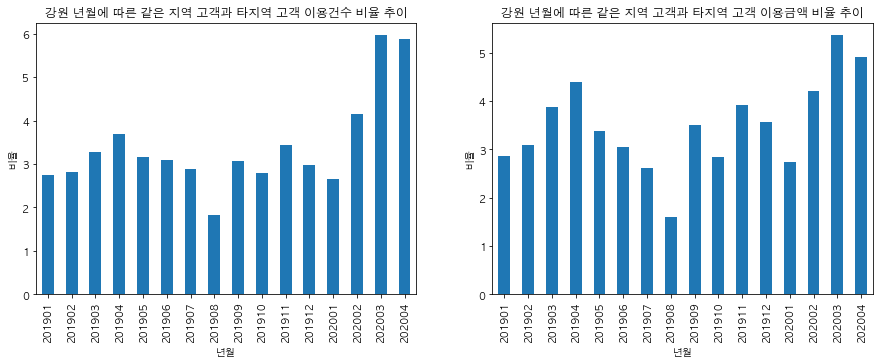

In [10]:
# 이용건수와 이용금액 시각화

plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)

CNTratio.plot.bar()
plt.xlabel('년월')
plt.ylabel('비율')
plt.title('강원 년월에 따른 같은 지역 고객과 타지역 고객 이용건수 비율 추이')

plt.subplot(1, 2, 2)

AMTratio.plot.bar()
plt.xlabel('년월')
plt.ylabel('비율')
plt.title('강원 년월에 따른 같은 지역 고객과 타지역 고객 이용금액 비율 추이')

plt.show()

In [19]:
# 코로나 전후 비교 (2019년 1월~4월, 2020년 1월~4월)

# 2019년 1월~4월, 2020년 1월~4월 이용건수 합 데이터 추출
SameCNT2019 = SameCNT.loc['201901':'201904']
SameCNT2020 = SameCNT.loc['202001':'202004']

DifferentCNT2019 = DifferentCNT.loc['201901':'201904']
DifferentCNT2020 = DifferentCNT.loc['202001':'202004']

# 2019년 1월~4월, 2020년 1월~4월 이용금액 합 데이터 추출
SameAMT2019 = SameAMT.loc['201901':'201904']
SameAMT2020 = SameAMT.loc['202001':'202004']

DifferentAMT2019 = DifferentAMT.loc['201901':'201904']
DifferentAMT2020 = DifferentAMT.loc['202001':'202004']

In [20]:
# 2019년 1월~4월, 2020년 1월~4월 이용금액 차이

SameAMTdifferenceValue = SameAMT2019.values - SameAMT2020.values
SameAMTdifferenceDF = {'REG_YYMM': [201901, 201902, 201903, 201904], '강원': SameAMTdifferenceValue}
SameAMTdifference = pd.DataFrame(SameAMTdifferenceDF, columns = ['REG_YYMM', '강원'])

DifferentAMTdifferenceValue = DifferentAMT2019.values - DifferentAMT2020.values
DifferentAMTdifferenceDF = {'REG_YYMM': [201901, 201902, 201903, 201904], '강원': DifferentAMTdifferenceValue}
DifferentAMTdifference = pd.DataFrame(DifferentAMTdifferenceDF, columns = ['REG_YYMM', '강원'])

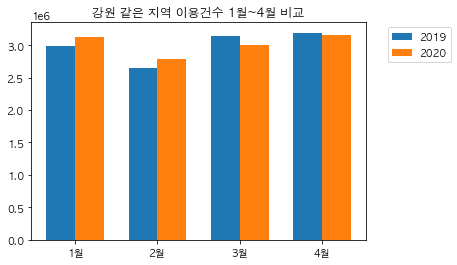

In [21]:
# 2019년 1월~4월, 2020년 1월~4월 같은 지역 이용건수 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, SameCNT2019, width)

p2 = ax.bar(ind + width, SameCNT2020, width)

ax.set_title('강원 같은 지역 이용건수 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()

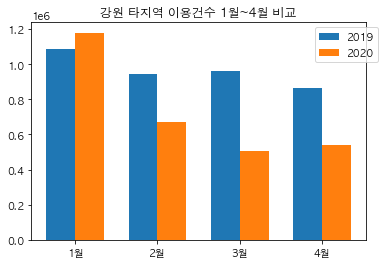

In [22]:
# 2019년 1월~4월, 2020년 1월~4월 타지역 이용건수 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, DifferentCNT2019, width)

p2 = ax.bar(ind + width, DifferentCNT2020, width)

ax.set_title('강원 타지역 이용건수 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()

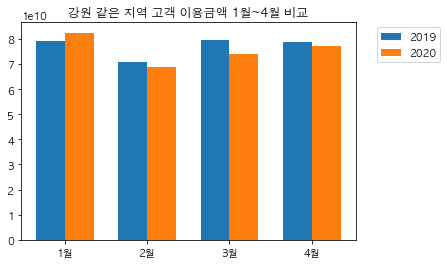

In [23]:
# 2019년 1월~4월, 2020년 1월~4월 같은 지역 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, SameAMT2019, width)

p2 = ax.bar(ind + width, SameAMT2020, width)

ax.set_title('강원 같은 지역 고객 이용금액 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()

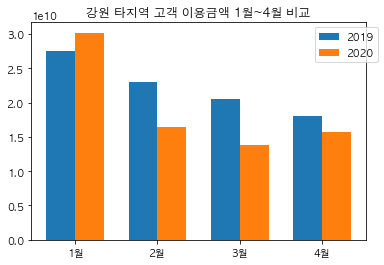

In [26]:
# 2019년 1월~4월, 2020년 1월~4월 타지역 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, DifferentAMT2019, width)

p2 = ax.bar(ind + width, DifferentAMT2020, width)

ax.set_title('강원 타지역 고객 이용금액 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()

In [27]:
# 이용금액 Sample T-test 실행

# 2019년 1~4월, 2020년 1~4월 이용금액 T-test

SameAMTttest = stats.ttest_ind(SameAMT2019.values, SameAMT2020.values)
DifferentAMTttest = stats.ttest_ind(DifferentAMT2019.values, DifferentAMT2020.values)

# 2019년 2월~4월, 2020년 2월~4월 이용건수 합 데이터 추출

SameAMT2019_2 = SameAMT.loc['201902':'201904']
SameAMT2020_2 = SameAMT.loc['202002':'202004']

DifferentAMT2019_2 = DifferentAMT.loc['201902':'201904']
DifferentAMT2020_2 = DifferentCNT.loc['202002':'202004']

# 2019년 2~4월, 2020년 2~4월 이용금액 T-test

SameAMTttest_2 = stats.ttest_ind(SameAMT2019_2.values, SameAMT2020_2.values)
DifferentAMTttest_2 = stats.ttest_ind(DifferentAMT2019_2.values, DifferentAMT2020_2.values)

print("2019년 1월~4월과 2020년 1월~4월 같은 지역 고객의 이용금액 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %SameAMTttest)
print("2019년 1월~4월과 2020년 1월~4월 타지역 고객의 이용금액 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %DifferentAMTttest)
print("2019년 2월~4월과 2020년 2월~4월 같은 지역 고객의 이용금액 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %SameAMTttest_2)
print("2019년 2월~4월과 2020년 2월~4월 타지역 고객의 이용금액 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %DifferentAMTttest_2)


2019년 1월~4월과 2020년 1월~4월 같은 지역 고객의 이용금액 t-statistics 값은 0.368 이며, p-value는 0.726 입니다.
2019년 1월~4월과 2020년 1월~4월 타지역 고객의 이용금액 t-statistics 값은 0.752 이며, p-value는 0.481 입니다.
2019년 2월~4월과 2020년 2월~4월 같은 지역 고객의 이용금액 t-statistics 값은 0.768 이며, p-value는 0.485 입니다.
2019년 2월~4월과 2020년 2월~4월 타지역 고객의 이용금액 t-statistics 값은 14.298 이며, p-value는 0.000 입니다.


## 경기

In [28]:
# 타지역 이용건수와 이용금액

DifferentCNT = differentDateCNT['경기']
DifferentAMT = differentDateAMT['경기']

# 같은지역 이용건수와 이용금액

SameCNT = sameDateCNT['경기']
SameAMT = sameDateAMT['경기']

# 타지역과 같은지역 비율

CNTratio = SameCNT/DifferentCNT
AMTratio = SameAMT/DifferentAMT


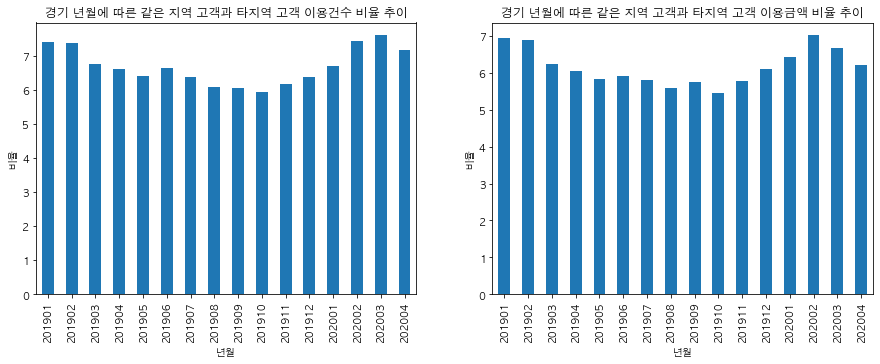

In [29]:
# 이용건수와 이용금액 시각화

plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)

CNTratio.plot.bar()
plt.xlabel('년월')
plt.ylabel('비율')
plt.title('경기 년월에 따른 같은 지역 고객과 타지역 고객 이용건수 비율 추이')

plt.subplot(1, 2, 2)

AMTratio.plot.bar()
plt.xlabel('년월')
plt.ylabel('비율')
plt.title('경기 년월에 따른 같은 지역 고객과 타지역 고객 이용금액 비율 추이')

plt.show()


In [30]:
# 코로나 전후 시각화

# 2019년 1월~4월, 2020년 1월~4월 이용건수 합 데이터 추출
SameCNT2019 = SameCNT.loc['201901':'201904']
SameCNT2020 = SameCNT.loc['202001':'202004']

DifferentCNT2019 = DifferentCNT.loc['201901':'201904']
DifferentCNT2020 = DifferentCNT.loc['202001':'202004']

# 2019년 1월~4월, 2020년 1월~4월 이용금액 합 데이터 추출
SameAMT2019 = SameAMT.loc['201901':'201904']
SameAMT2020 = SameAMT.loc['202001':'202004']

DifferentAMT2019 = DifferentAMT.loc['201901':'201904']
DifferentAMT2020 = DifferentAMT.loc['202001':'202004']


In [31]:
# 2019년 1월~4월, 2020년 1월~4월 이용금액 차이

SameAMTdifferenceValue = SameAMT2019.values - SameAMT2020.values
SameAMTdifferenceDF2 = {'경기': SameAMTdifferenceValue}
SameAMTdifference2 = pd.DataFrame(SameAMTdifferenceDF2, columns = ['경기'])

SameAMTdifference = pd.concat([SameAMTdifference, SameAMTdifference2], axis=1)

DifferentAMTdifferenceValue = DifferentAMT2019.values - DifferentAMT2020.values
DifferentAMTdifferenceDF2 = {'경기': DifferentAMTdifferenceValue}
DifferentAMTdifference2 = pd.DataFrame(DifferentAMTdifferenceDF2, columns = ['경기'])

DifferentAMTdifference = pd.concat([DifferentAMTdifference, DifferentAMTdifference2], axis=1)

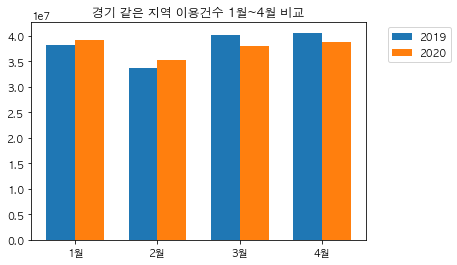

In [20]:
# 2019년 1월~4월, 2020년 1월~4월 같은 지역 이용건수 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, SameCNT2019, width)

p2 = ax.bar(ind + width, SameCNT2020, width)

ax.set_title('경기 같은 지역 이용건수 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()

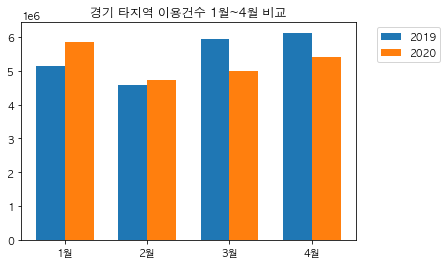

In [21]:
# 2019년 1월~4월, 2020년 1월~4월 타지역 이용건수 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, DifferentCNT2019, width)

p2 = ax.bar(ind + width, DifferentCNT2020, width)

ax.set_title('경기 타지역 이용건수 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()

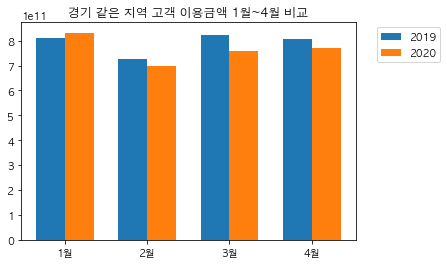

In [22]:
# 2019년 1월~4월, 2020년 1월~4월 같은 지역 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, SameAMT2019, width)

p2 = ax.bar(ind + width, SameAMT2020, width)

ax.set_title('경기 같은 지역 고객 이용금액 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()

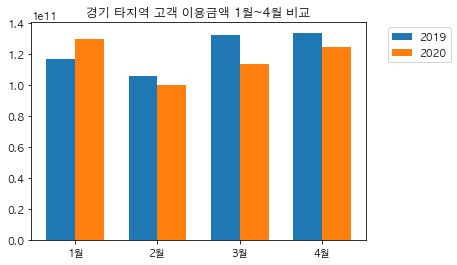

In [23]:
# 2019년 1월~4월, 2020년 1월~4월 타지역 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, DifferentAMT2019, width)

p2 = ax.bar(ind + width, DifferentAMT2020, width)

ax.set_title('경기 타지역 고객 이용금액 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()

In [24]:
# 이용금액 Sample T-test 실행

# 2019년 1~4월, 2020년 1~4월 이용금액 T-test

SameAMTttest = stats.ttest_ind(SameAMT2019.values, SameAMT2020.values)
DifferentAMTttest = stats.ttest_ind(DifferentAMT2019.values, DifferentAMT2020.values)

# 2019년 2월~4월, 2020년 2월~4월 이용건수 합 데이터 추출

SameAMT2019_2 = SameAMT.loc['201902':'201904']
SameAMT2020_2 = SameAMT.loc['202002':'202004']

DifferentAMT2019_2 = DifferentAMT.loc['201902':'201904']
DifferentAMT2020_2 = DifferentCNT.loc['202002':'202004']

# 2019년 2~4월, 2020년 2~4월 이용금액 T-test

SameAMTttest_2 = stats.ttest_ind(SameAMT2019_2.values, SameAMT2020_2.values)
DifferentAMTttest_2 = stats.ttest_ind(DifferentAMT2019_2.values, DifferentAMT2020_2.values)

print("2019년 1월~4월과 2020년 1월~4월 같은 지역 고객의 이용금액 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %SameAMTttest)
print("2019년 1월~4월과 2020년 1월~4월 타지역 고객의 이용금액 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %DifferentAMTttest)
print("2019년 2월~4월과 2020년 2월~4월 같은 지역 고객의 이용금액 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %SameAMTttest_2)
print("2019년 2월~4월과 2020년 2월~4월 타지역 고객의 이용금액 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %DifferentAMTttest_2)

2019년 1월~4월과 2020년 1월~4월 같은 지역 고객의 이용금액 t-statistics 값은 0.774 이며, p-value는 0.468 입니다.
2019년 1월~4월과 2020년 1월~4월 타지역 고객의 이용금액 t-statistics 값은 0.571 이며, p-value는 0.589 입니다.
2019년 2월~4월과 2020년 2월~4월 같은 지역 고객의 이용금액 t-statistics 값은 1.170 이며, p-value는 0.307 입니다.
2019년 2월~4월과 2020년 2월~4월 타지역 고객의 이용금액 t-statistics 값은 13.643 이며, p-value는 0.000 입니다.


## 경남

In [25]:
# 타지역 이용건수와 이용금액

DifferentCNT = differentDateCNT['경남']
DifferentAMT = differentDateAMT['경남']

# 같은지역 이용건수와 이용금액

SameCNT = sameDateCNT['경남']
SameAMT = sameDateAMT['경남']

# 타지역과 같은지역 비율

CNTratio = SameCNT/DifferentCNT
AMTratio = SameAMT/DifferentAMT


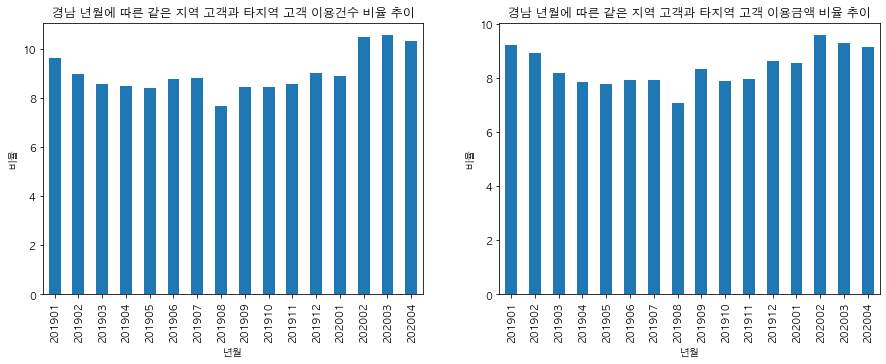

In [26]:
# 이용건수와 이용금액 시각화

plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)

CNTratio.plot.bar()
plt.xlabel('년월')
plt.ylabel('비율')
plt.title('경남 년월에 따른 같은 지역 고객과 타지역 고객 이용건수 비율 추이')

plt.subplot(1, 2, 2)

AMTratio.plot.bar()
plt.xlabel('년월')
plt.ylabel('비율')
plt.title('경남 년월에 따른 같은 지역 고객과 타지역 고객 이용금액 비율 추이')

plt.show()


In [27]:
# 코로나 전후 시각화

# 2019년 1월~4월, 2020년 1월~4월 이용건수 합 데이터 추출
SameCNT2019 = SameCNT.loc['201901':'201904']
SameCNT2020 = SameCNT.loc['202001':'202004']

DifferentCNT2019 = DifferentCNT.loc['201901':'201904']
DifferentCNT2020 = DifferentCNT.loc['202001':'202004']

# 2019년 1월~4월, 2020년 1월~4월 이용금액 합 데이터 추출
SameAMT2019 = SameAMT.loc['201901':'201904']
SameAMT2020 = SameAMT.loc['202001':'202004']

DifferentAMT2019 = DifferentAMT.loc['201901':'201904']
DifferentAMT2020 = DifferentAMT.loc['202001':'202004']


In [28]:
# 2019년 1월~4월, 2020년 1월~4월 이용금액 차이

SameAMTdifferenceValue = SameAMT2019.values - SameAMT2020.values
SameAMTdifferenceDF2 = {'경남': SameAMTdifferenceValue}
SameAMTdifference2 = pd.DataFrame(SameAMTdifferenceDF2, columns = ['경남'])

SameAMTdifference = pd.concat([SameAMTdifference, SameAMTdifference2], axis=1)

DifferentAMTdifferenceValue = DifferentAMT2019.values - DifferentAMT2020.values
DifferentAMTdifferenceDF2 = {'경남': DifferentAMTdifferenceValue}
DifferentAMTdifference2 = pd.DataFrame(DifferentAMTdifferenceDF2, columns = ['경남'])

DifferentAMTdifference = pd.concat([DifferentAMTdifference, DifferentAMTdifference2], axis=1)


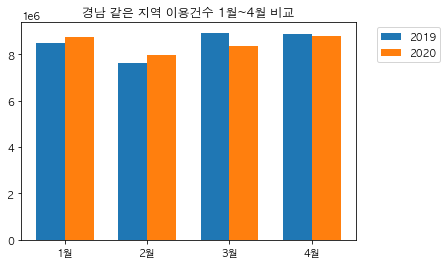

In [29]:
# 2019년 1월~4월, 2020년 1월~4월 같은 지역 이용건수 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, SameCNT2019, width)

p2 = ax.bar(ind + width, SameCNT2020, width)

ax.set_title('경남 같은 지역 이용건수 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()

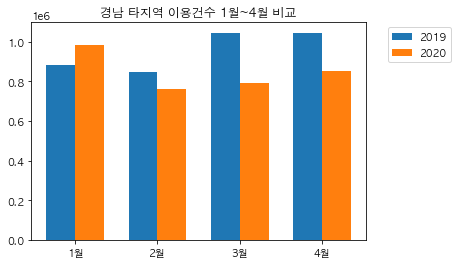

In [30]:
# 2019년 1월~4월, 2020년 1월~4월 타지역 이용건수 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, DifferentCNT2019, width)

p2 = ax.bar(ind + width, DifferentCNT2020, width)

ax.set_title('경남 타지역 이용건수 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()


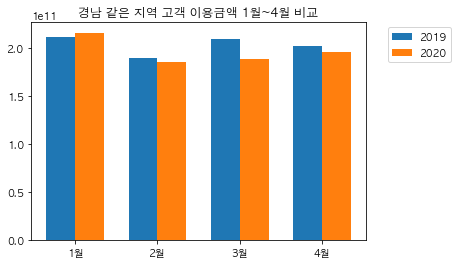

In [31]:
# 2019년 1월~4월, 2020년 1월~4월 같은 지역 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, SameAMT2019, width)

p2 = ax.bar(ind + width, SameAMT2020, width)

ax.set_title('경남 같은 지역 고객 이용금액 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()


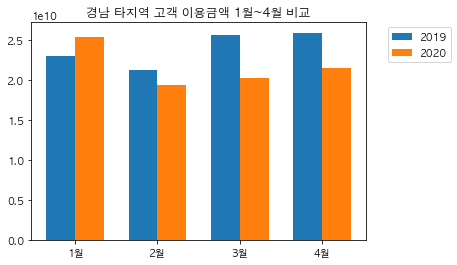

In [32]:
# 2019년 1월~4월, 2020년 1월~4월 타지역 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, DifferentAMT2019, width)

p2 = ax.bar(ind + width, DifferentAMT2020, width)

ax.set_title('경남 타지역 고객 이용금액 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()


In [33]:
# 이용금액 Sample T-test 실행

# 2019년 1~4월, 2020년 1~4월 이용금액 T-test

SameAMTttest = stats.ttest_ind(SameAMT2019.values, SameAMT2020.values)
DifferentAMTttest = stats.ttest_ind(DifferentAMT2019.values, DifferentAMT2020.values)

# 2019년 2월~4월, 2020년 2월~4월 이용건수 합 데이터 추출

SameAMT2019_2 = SameAMT.loc['201902':'201904']
SameAMT2020_2 = SameAMT.loc['202002':'202004']

DifferentAMT2019_2 = DifferentAMT.loc['201902':'201904']
DifferentAMT2020_2 = DifferentCNT.loc['202002':'202004']

# 2019년 2~4월, 2020년 2~4월 이용금액 T-test

SameAMTttest_2 = stats.ttest_ind(SameAMT2019_2.values, SameAMT2020_2.values)
DifferentAMTttest_2 = stats.ttest_ind(DifferentAMT2019_2.values, DifferentAMT2020_2.values)

print("2019년 1월~4월과 2020년 1월~4월 같은 지역 고객의 이용금액 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %SameAMTttest)
print("2019년 1월~4월과 2020년 1월~4월 타지역 고객의 이용금액 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %DifferentAMTttest)
print("2019년 2월~4월과 2020년 2월~4월 같은 지역 고객의 이용금액 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %SameAMTttest_2)
print("2019년 2월~4월과 2020년 2월~4월 타지역 고객의 이용금액 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %DifferentAMTttest_2)

2019년 1월~4월과 2020년 1월~4월 같은 지역 고객의 이용금액 t-statistics 값은 0.802 이며, p-value는 0.453 입니다.
2019년 1월~4월과 2020년 1월~4월 타지역 고객의 이용금액 t-statistics 값은 1.346 이며, p-value는 0.227 입니다.
2019년 2월~4월과 2020년 2월~4월 같은 지역 고객의 이용금액 t-statistics 값은 1.603 이며, p-value는 0.184 입니다.
2019년 2월~4월과 2020년 2월~4월 타지역 고객의 이용금액 t-statistics 값은 16.121 이며, p-value는 0.000 입니다.


## 경북

In [34]:
# 타지역 이용건수와 이용금액

DifferentCNT = differentDateCNT['경북']
DifferentAMT = differentDateAMT['경북']

# 같은지역 이용건수와 이용금액

SameCNT = sameDateCNT['경북']
SameAMT = sameDateAMT['경북']

# 타지역과 같은지역 비율

CNTratio = SameCNT/DifferentCNT
AMTratio = SameAMT/DifferentAMT


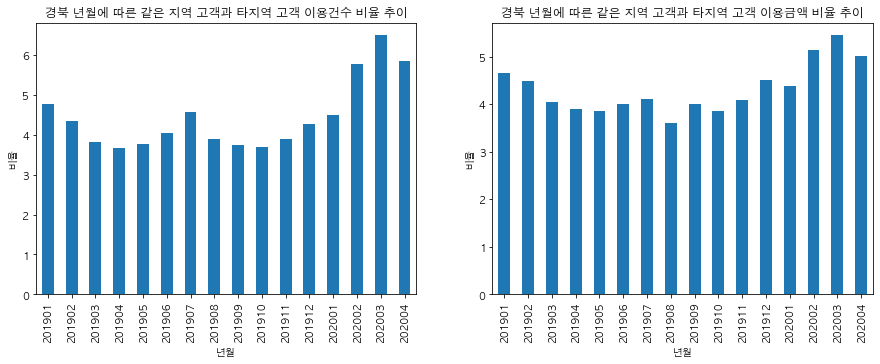

In [35]:
# 이용건수와 이용금액 시각화

plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)

CNTratio.plot.bar()
plt.xlabel('년월')
plt.ylabel('비율')
plt.title('경북 년월에 따른 같은 지역 고객과 타지역 고객 이용건수 비율 추이')

plt.subplot(1, 2, 2)

AMTratio.plot.bar()
plt.xlabel('년월')
plt.ylabel('비율')
plt.title('경북 년월에 따른 같은 지역 고객과 타지역 고객 이용금액 비율 추이')

plt.show()


In [36]:
# 코로나 전후 시각화

# 2019년 1월~4월, 2020년 1월~4월 이용건수 합 데이터 추출
SameCNT2019 = SameCNT.loc['201901':'201904']
SameCNT2020 = SameCNT.loc['202001':'202004']

DifferentCNT2019 = DifferentCNT.loc['201901':'201904']
DifferentCNT2020 = DifferentCNT.loc['202001':'202004']

# 2019년 1월~4월, 2020년 1월~4월 이용금액 합 데이터 추출
SameAMT2019 = SameAMT.loc['201901':'201904']
SameAMT2020 = SameAMT.loc['202001':'202004']

DifferentAMT2019 = DifferentAMT.loc['201901':'201904']
DifferentAMT2020 = DifferentAMT.loc['202001':'202004']


In [37]:
# 2019년 1월~4월, 2020년 1월~4월 이용금액 차이

SameAMTdifferenceValue = SameAMT2019.values - SameAMT2020.values
SameAMTdifferenceDF2 = {'경북': SameAMTdifferenceValue}
SameAMTdifference2 = pd.DataFrame(SameAMTdifferenceDF2, columns = ['경북'])

SameAMTdifference = pd.concat([SameAMTdifference, SameAMTdifference2], axis=1)

DifferentAMTdifferenceValue = DifferentAMT2019.values - DifferentAMT2020.values
DifferentAMTdifferenceDF2 = {'경북': DifferentAMTdifferenceValue}
DifferentAMTdifference2 = pd.DataFrame(DifferentAMTdifferenceDF2, columns = ['경북'])

DifferentAMTdifference = pd.concat([DifferentAMTdifference, DifferentAMTdifference2], axis=1)


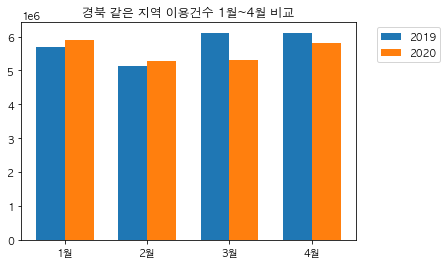

In [38]:
# 2019년 1월~4월, 2020년 1월~4월 같은 지역 이용건수 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, SameCNT2019, width)

p2 = ax.bar(ind + width, SameCNT2020, width)

ax.set_title('경북 같은 지역 이용건수 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()


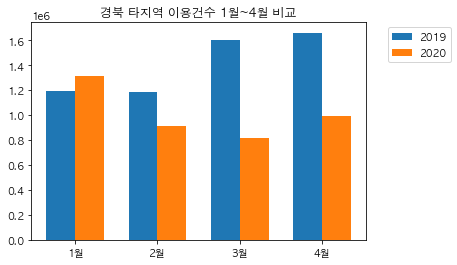

In [39]:
# 2019년 1월~4월, 2020년 1월~4월 타지역 이용건수 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, DifferentCNT2019, width)

p2 = ax.bar(ind + width, DifferentCNT2020, width)

ax.set_title('경북 타지역 이용건수 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()


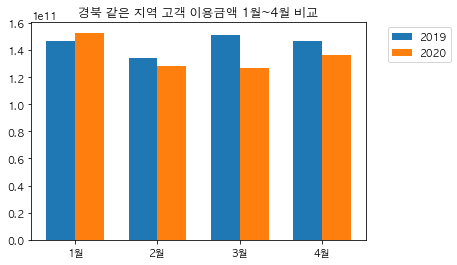

In [40]:
# 2019년 1월~4월, 2020년 1월~4월 같은 지역 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, SameAMT2019, width)

p2 = ax.bar(ind + width, SameAMT2020, width)

ax.set_title('경북 같은 지역 고객 이용금액 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()


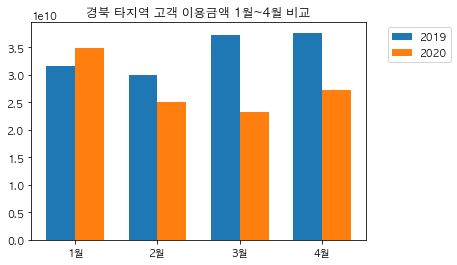

In [41]:
# 2019년 1월~4월, 2020년 1월~4월 타지역 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, DifferentAMT2019, width)

p2 = ax.bar(ind + width, DifferentAMT2020, width)

ax.set_title('경북 타지역 고객 이용금액 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()


In [42]:
# 이용금액 Sample T-test 실행

# 2019년 1~4월, 2020년 1~4월 이용금액 T-test

SameAMTttest = stats.ttest_ind(SameAMT2019.values, SameAMT2020.values)
DifferentAMTttest = stats.ttest_ind(DifferentAMT2019.values, DifferentAMT2020.values)

# 2019년 2월~4월, 2020년 2월~4월 이용건수 합 데이터 추출

SameAMT2019_2 = SameAMT.loc['201902':'201904']
SameAMT2020_2 = SameAMT.loc['202002':'202004']

DifferentAMT2019_2 = DifferentAMT.loc['201902':'201904']
DifferentAMT2020_2 = DifferentCNT.loc['202002':'202004']

# 2019년 2~4월, 2020년 2~4월 이용금액 T-test

SameAMTttest_2 = stats.ttest_ind(SameAMT2019_2.values, SameAMT2020_2.values)
DifferentAMTttest_2 = stats.ttest_ind(DifferentAMT2019_2.values, DifferentAMT2020_2.values)

print("2019년 1월~4월과 2020년 1월~4월 같은 지역 고객의 이용금액 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %SameAMTttest)
print("2019년 1월~4월과 2020년 1월~4월 타지역 고객의 이용금액 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %DifferentAMTttest)
print("2019년 2월~4월과 2020년 2월~4월 같은 지역 고객의 이용금액 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %SameAMTttest_2)
print("2019년 2월~4월과 2020년 2월~4월 타지역 고객의 이용금액 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %DifferentAMTttest_2)

2019년 1월~4월과 2020년 1월~4월 같은 지역 고객의 이용금액 t-statistics 값은 1.233 이며, p-value는 0.264 입니다.
2019년 1월~4월과 2020년 1월~4월 타지역 고객의 이용금액 t-statistics 값은 2.013 이며, p-value는 0.091 입니다.
2019년 2월~4월과 2020년 2월~4월 같은 지역 고객의 이용금액 t-statistics 값은 2.308 이며, p-value는 0.082 입니다.
2019년 2월~4월과 2020년 2월~4월 타지역 고객의 이용금액 t-statistics 값은 13.911 이며, p-value는 0.000 입니다.


## 광주

In [43]:
# 타지역 이용건수와 이용금액

DifferentCNT = differentDateCNT['광주']
DifferentAMT = differentDateAMT['광주']

# 같은지역 이용건수와 이용금액

SameCNT = sameDateCNT['광주']
SameAMT = sameDateAMT['광주']

# 타지역과 같은지역 비율

CNTratio = SameCNT/DifferentCNT
AMTratio = SameAMT/DifferentAMT


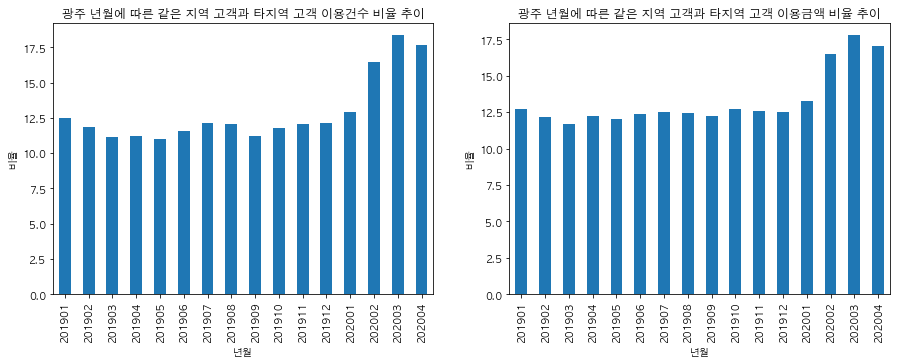

In [44]:
# 이용건수와 이용금액 시각화

plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)

CNTratio.plot.bar()
plt.xlabel('년월')
plt.ylabel('비율')
plt.title('광주 년월에 따른 같은 지역 고객과 타지역 고객 이용건수 비율 추이')

plt.subplot(1, 2, 2)

AMTratio.plot.bar()
plt.xlabel('년월')
plt.ylabel('비율')
plt.title('광주 년월에 따른 같은 지역 고객과 타지역 고객 이용금액 비율 추이')

plt.show()


In [45]:
# 코로나 전후 시각화

# 2019년 1월~4월, 2020년 1월~4월 이용건수 합 데이터 추출
SameCNT2019 = SameCNT.loc['201901':'201904']
SameCNT2020 = SameCNT.loc['202001':'202004']

DifferentCNT2019 = DifferentCNT.loc['201901':'201904']
DifferentCNT2020 = DifferentCNT.loc['202001':'202004']

# 2019년 1월~4월, 2020년 1월~4월 이용금액 합 데이터 추출
SameAMT2019 = SameAMT.loc['201901':'201904']
SameAMT2020 = SameAMT.loc['202001':'202004']

DifferentAMT2019 = DifferentAMT.loc['201901':'201904']
DifferentAMT2020 = DifferentAMT.loc['202001':'202004']


In [46]:
# 2019년 1월~4월, 2020년 1월~4월 이용금액 차이

SameAMTdifferenceValue = SameAMT2019.values - SameAMT2020.values
SameAMTdifferenceDF2 = {'광주': SameAMTdifferenceValue}
SameAMTdifference2 = pd.DataFrame(SameAMTdifferenceDF2, columns = ['광주'])

SameAMTdifference = pd.concat([SameAMTdifference, SameAMTdifference2], axis=1)

DifferentAMTdifferenceValue = DifferentAMT2019.values - DifferentAMT2020.values
DifferentAMTdifferenceDF2 = {'광주': DifferentAMTdifferenceValue}
DifferentAMTdifference2 = pd.DataFrame(DifferentAMTdifferenceDF2, columns = ['광주'])

DifferentAMTdifference = pd.concat([DifferentAMTdifference, DifferentAMTdifference2], axis=1)


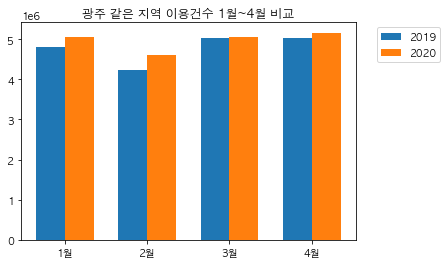

In [47]:
# 2019년 1월~4월, 2020년 1월~4월 같은 지역 이용건수 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, SameCNT2019, width)

p2 = ax.bar(ind + width, SameCNT2020, width)

ax.set_title('광주 같은 지역 이용건수 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()


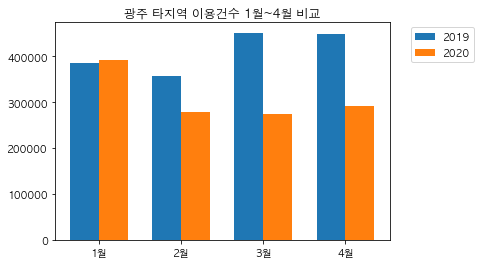

In [48]:
# 2019년 1월~4월, 2020년 1월~4월 타지역 이용건수 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, DifferentCNT2019, width)

p2 = ax.bar(ind + width, DifferentCNT2020, width)

ax.set_title('광주 타지역 이용건수 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()


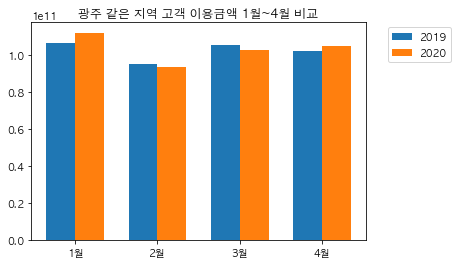

In [49]:
# 2019년 1월~4월, 2020년 1월~4월 같은 지역 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, SameAMT2019, width)

p2 = ax.bar(ind + width, SameAMT2020, width)

ax.set_title('광주 같은 지역 고객 이용금액 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()


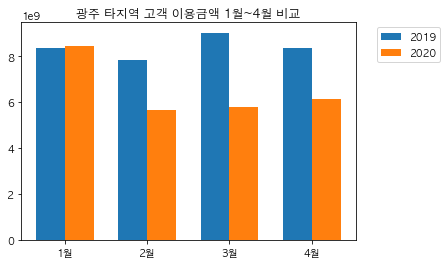

In [50]:
# 2019년 1월~4월, 2020년 1월~4월 타지역 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, DifferentAMT2019, width)

p2 = ax.bar(ind + width, DifferentAMT2020, width)

ax.set_title('광주 타지역 고객 이용금액 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()


In [51]:
# 이용금액 Sample T-test 실행

# 2019년 1~4월, 2020년 1~4월 이용금액 T-test

SameAMTttest = stats.ttest_ind(SameAMT2019.values, SameAMT2020.values)
DifferentAMTttest = stats.ttest_ind(DifferentAMT2019.values, DifferentAMT2020.values)

# 2019년 2월~4월, 2020년 2월~4월 이용건수 합 데이터 추출

SameAMT2019_2 = SameAMT.loc['201902':'201904']
SameAMT2020_2 = SameAMT.loc['202002':'202004']

DifferentAMT2019_2 = DifferentAMT.loc['201902':'201904']
DifferentAMT2020_2 = DifferentCNT.loc['202002':'202004']

# 2019년 2~4월, 2020년 2~4월 이용금액 T-test

SameAMTttest_2 = stats.ttest_ind(SameAMT2019_2.values, SameAMT2020_2.values)
DifferentAMTttest_2 = stats.ttest_ind(DifferentAMT2019_2.values, DifferentAMT2020_2.values)

print("2019년 1월~4월과 2020년 1월~4월 같은 지역 고객의 이용금액 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %SameAMTttest)
print("2019년 1월~4월과 2020년 1월~4월 타지역 고객의 이용금액 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %DifferentAMTttest)
print("2019년 2월~4월과 2020년 2월~4월 같은 지역 고객의 이용금액 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %SameAMTttest_2)
print("2019년 2월~4월과 2020년 2월~4월 타지역 고객의 이용금액 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %DifferentAMTttest_2)

2019년 1월~4월과 2020년 1월~4월 같은 지역 고객의 이용금액 t-statistics 값은 -0.192 이며, p-value는 0.854 입니다.
2019년 1월~4월과 2020년 1월~4월 타지역 고객의 이용금액 t-statistics 값은 2.682 이며, p-value는 0.036 입니다.
2019년 2월~4월과 2020년 2월~4월 같은 지역 고객의 이용금액 t-statistics 값은 0.163 이며, p-value는 0.878 입니다.
2019년 2월~4월과 2020년 2월~4월 타지역 고객의 이용금액 t-statistics 값은 24.013 이며, p-value는 0.000 입니다.


## 대구

In [52]:
# 타지역 이용건수와 이용금액

DifferentCNT = differentDateCNT['광주']
DifferentAMT = differentDateAMT['광주']

# 같은지역 이용건수와 이용금액

SameCNT = sameDateCNT['광주']
SameAMT = sameDateAMT['광주']

# 타지역과 같은지역 비율

CNTratio = SameCNT/DifferentCNT
AMTratio = SameAMT/DifferentAMT


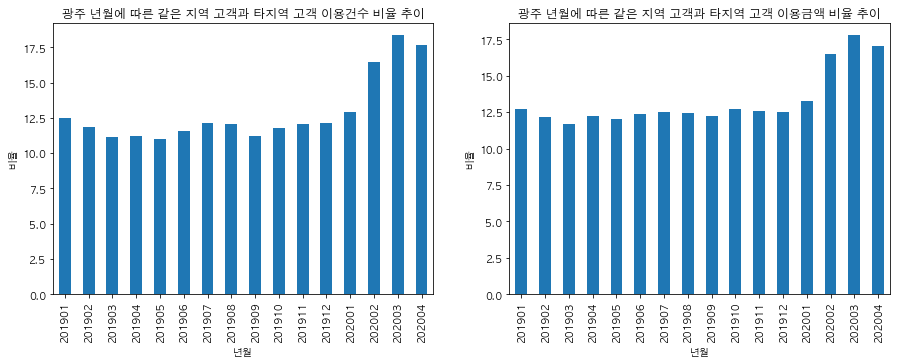

In [53]:
# 이용건수와 이용금액 시각화

plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)

CNTratio.plot.bar()
plt.xlabel('년월')
plt.ylabel('비율')
plt.title('광주 년월에 따른 같은 지역 고객과 타지역 고객 이용건수 비율 추이')

plt.subplot(1, 2, 2)

AMTratio.plot.bar()
plt.xlabel('년월')
plt.ylabel('비율')
plt.title('광주 년월에 따른 같은 지역 고객과 타지역 고객 이용금액 비율 추이')

plt.show()


In [54]:
# 코로나 전후 시각화

# 2019년 1월~4월, 2020년 1월~4월 이용건수 합 데이터 추출
SameCNT2019 = SameCNT.loc['201901':'201904']
SameCNT2020 = SameCNT.loc['202001':'202004']

DifferentCNT2019 = DifferentCNT.loc['201901':'201904']
DifferentCNT2020 = DifferentCNT.loc['202001':'202004']

# 2019년 1월~4월, 2020년 1월~4월 이용금액 합 데이터 추출
SameAMT2019 = SameAMT.loc['201901':'201904']
SameAMT2020 = SameAMT.loc['202001':'202004']

DifferentAMT2019 = DifferentAMT.loc['201901':'201904']
DifferentAMT2020 = DifferentAMT.loc['202001':'202004']


In [55]:
# 2019년 1월~4월, 2020년 1월~4월 이용금액 차이

SameAMTdifferenceValue = SameAMT2019.values - SameAMT2020.values
SameAMTdifferenceDF2 = {'광주': SameAMTdifferenceValue}
SameAMTdifference2 = pd.DataFrame(SameAMTdifferenceDF2, columns = ['광주'])

SameAMTdifference = pd.concat([SameAMTdifference, SameAMTdifference2], axis=1)

DifferentAMTdifferenceValue = DifferentAMT2019.values - DifferentAMT2020.values
DifferentAMTdifferenceDF2 = {'광주': DifferentAMTdifferenceValue}
DifferentAMTdifference2 = pd.DataFrame(DifferentAMTdifferenceDF2, columns = ['광주'])

DifferentAMTdifference = pd.concat([DifferentAMTdifference, DifferentAMTdifference2], axis=1)

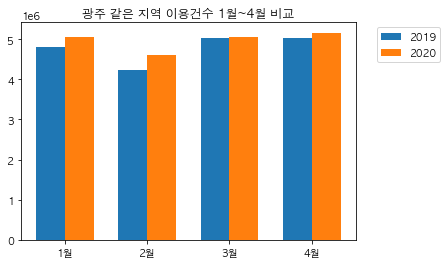

In [56]:
# 2019년 1월~4월, 2020년 1월~4월 같은 지역 이용건수 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, SameCNT2019, width)

p2 = ax.bar(ind + width, SameCNT2020, width)

ax.set_title('광주 같은 지역 이용건수 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()


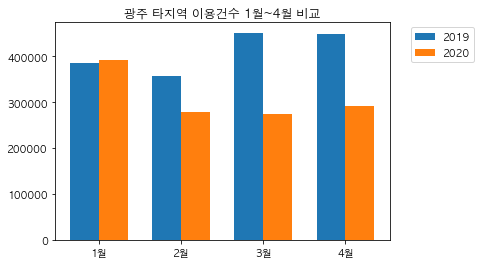

In [57]:
# 2019년 1월~4월, 2020년 1월~4월 타지역 이용건수 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, DifferentCNT2019, width)

p2 = ax.bar(ind + width, DifferentCNT2020, width)

ax.set_title('광주 타지역 이용건수 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()


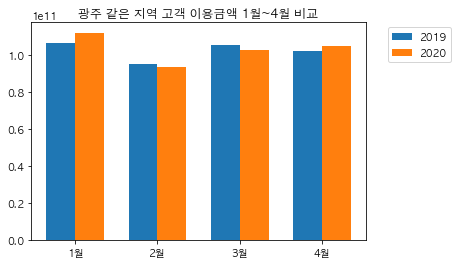

In [58]:
# 2019년 1월~4월, 2020년 1월~4월 같은 지역 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, SameAMT2019, width)

p2 = ax.bar(ind + width, SameAMT2020, width)

ax.set_title('광주 같은 지역 고객 이용금액 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()


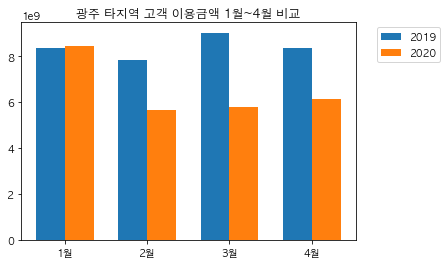

In [59]:
# 2019년 1월~4월, 2020년 1월~4월 타지역 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, DifferentAMT2019, width)

p2 = ax.bar(ind + width, DifferentAMT2020, width)

ax.set_title('광주 타지역 고객 이용금액 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()


In [60]:
# 이용금액 Sample T-test 실행

# 2019년 1~4월, 2020년 1~4월 이용금액 T-test

SameAMTttest = stats.ttest_ind(SameAMT2019.values, SameAMT2020.values)
DifferentAMTttest = stats.ttest_ind(DifferentAMT2019.values, DifferentAMT2020.values)

# 2019년 2월~4월, 2020년 2월~4월 이용건수 합 데이터 추출

SameAMT2019_2 = SameAMT.loc['201902':'201904']
SameAMT2020_2 = SameAMT.loc['202002':'202004']

DifferentAMT2019_2 = DifferentAMT.loc['201902':'201904']
DifferentAMT2020_2 = DifferentCNT.loc['202002':'202004']

# 2019년 2~4월, 2020년 2~4월 이용금액 T-test

SameAMTttest_2 = stats.ttest_ind(SameAMT2019_2.values, SameAMT2020_2.values)
DifferentAMTttest_2 = stats.ttest_ind(DifferentAMT2019_2.values, DifferentAMT2020_2.values)

print("2019년 1월~4월과 2020년 1월~4월 같은 지역 고객의 이용금액 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %SameAMTttest)
print("2019년 1월~4월과 2020년 1월~4월 타지역 고객의 이용금액 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %DifferentAMTttest)
print("2019년 2월~4월과 2020년 2월~4월 같은 지역 고객의 이용금액 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %SameAMTttest_2)
print("2019년 2월~4월과 2020년 2월~4월 타지역 고객의 이용금액 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %DifferentAMTttest_2)

2019년 1월~4월과 2020년 1월~4월 같은 지역 고객의 이용금액 t-statistics 값은 -0.192 이며, p-value는 0.854 입니다.
2019년 1월~4월과 2020년 1월~4월 타지역 고객의 이용금액 t-statistics 값은 2.682 이며, p-value는 0.036 입니다.
2019년 2월~4월과 2020년 2월~4월 같은 지역 고객의 이용금액 t-statistics 값은 0.163 이며, p-value는 0.878 입니다.
2019년 2월~4월과 2020년 2월~4월 타지역 고객의 이용금액 t-statistics 값은 24.013 이며, p-value는 0.000 입니다.


## 대구

In [61]:
# 타지역 이용건수와 이용금액

DifferentCNT = differentDateCNT['대구']
DifferentAMT = differentDateAMT['대구']

# 같은지역 이용건수와 이용금액

SameCNT = sameDateCNT['대구']
SameAMT = sameDateAMT['대구']

# 타지역과 같은지역 비율

CNTratio = SameCNT/DifferentCNT
AMTratio = SameAMT/DifferentAMT


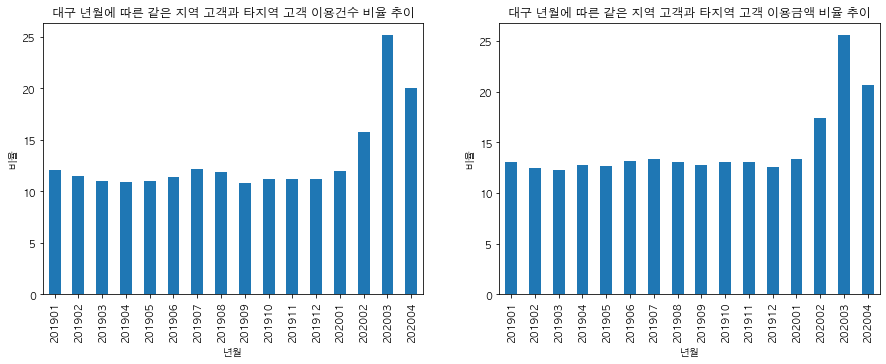

In [62]:
# 이용건수와 이용금액 시각화

plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)

CNTratio.plot.bar()
plt.xlabel('년월')
plt.ylabel('비율')
plt.title('대구 년월에 따른 같은 지역 고객과 타지역 고객 이용건수 비율 추이')

plt.subplot(1, 2, 2)

AMTratio.plot.bar()
plt.xlabel('년월')
plt.ylabel('비율')
plt.title('대구 년월에 따른 같은 지역 고객과 타지역 고객 이용금액 비율 추이')

plt.show()


In [63]:
# 코로나 전후 시각화

# 2019년 1월~4월, 2020년 1월~4월 이용건수 합 데이터 추출
SameCNT2019 = SameCNT.loc['201901':'201904']
SameCNT2020 = SameCNT.loc['202001':'202004']

DifferentCNT2019 = DifferentCNT.loc['201901':'201904']
DifferentCNT2020 = DifferentCNT.loc['202001':'202004']

# 2019년 1월~4월, 2020년 1월~4월 이용금액 합 데이터 추출
SameAMT2019 = SameAMT.loc['201901':'201904']
SameAMT2020 = SameAMT.loc['202001':'202004']

DifferentAMT2019 = DifferentAMT.loc['201901':'201904']
DifferentAMT2020 = DifferentAMT.loc['202001':'202004']


In [64]:
# 2019년 1월~4월, 2020년 1월~4월 이용금액 차이

SameAMTdifferenceValue = SameAMT2019.values - SameAMT2020.values
SameAMTdifferenceDF2 = {'대구': SameAMTdifferenceValue}
SameAMTdifference2 = pd.DataFrame(SameAMTdifferenceDF2, columns = ['대구'])

SameAMTdifference = pd.concat([SameAMTdifference, SameAMTdifference2], axis=1)

DifferentAMTdifferenceValue = DifferentAMT2019.values - DifferentAMT2020.values
DifferentAMTdifferenceDF2 = {'대구': DifferentAMTdifferenceValue}
DifferentAMTdifference2 = pd.DataFrame(DifferentAMTdifferenceDF2, columns = ['대구'])

DifferentAMTdifference = pd.concat([DifferentAMTdifference, DifferentAMTdifference2], axis=1)


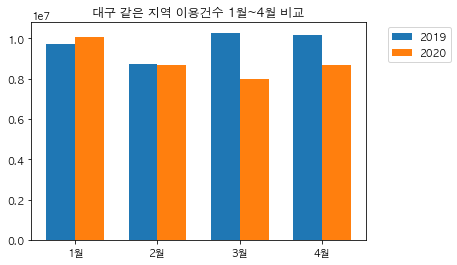

In [65]:
# 2019년 1월~4월, 2020년 1월~4월 같은 지역 이용건수 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, SameCNT2019, width)

p2 = ax.bar(ind + width, SameCNT2020, width)

ax.set_title('대구 같은 지역 이용건수 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()


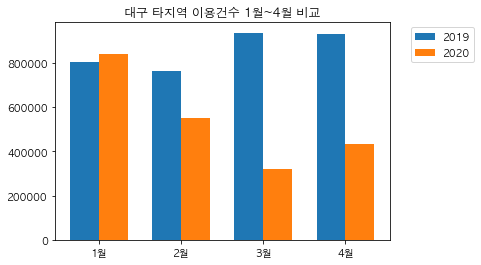

In [66]:
# 2019년 1월~4월, 2020년 1월~4월 타지역 이용건수 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, DifferentCNT2019, width)

p2 = ax.bar(ind + width, DifferentCNT2020, width)

ax.set_title('대구 타지역 이용건수 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()


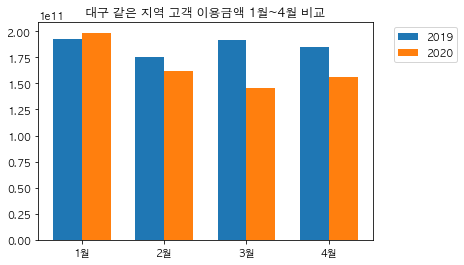

In [67]:
# 2019년 1월~4월, 2020년 1월~4월 같은 지역 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, SameAMT2019, width)

p2 = ax.bar(ind + width, SameAMT2020, width)

ax.set_title('대구 같은 지역 고객 이용금액 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()


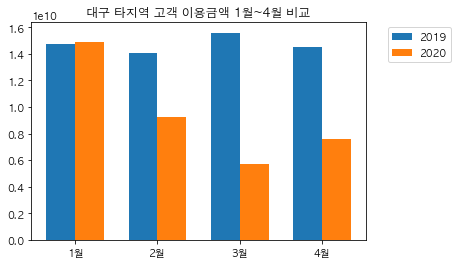

In [68]:
# 2019년 1월~4월, 2020년 1월~4월 타지역 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, DifferentAMT2019, width)

p2 = ax.bar(ind + width, DifferentAMT2020, width)

ax.set_title('대구 타지역 고객 이용금액 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()


In [69]:
# 이용금액 Sample T-test 실행

# 2019년 1~4월, 2020년 1~4월 이용금액 T-test

SameAMTttest = stats.ttest_ind(SameAMT2019.values, SameAMT2020.values)
DifferentAMTttest = stats.ttest_ind(DifferentAMT2019.values, DifferentAMT2020.values)

# 2019년 2월~4월, 2020년 2월~4월 이용건수 합 데이터 추출

SameAMT2019_2 = SameAMT.loc['201902':'201904']
SameAMT2020_2 = SameAMT.loc['202002':'202004']

DifferentAMT2019_2 = DifferentAMT.loc['201902':'201904']
DifferentAMT2020_2 = DifferentCNT.loc['202002':'202004']

# 2019년 2~4월, 2020년 2~4월 이용금액 T-test

SameAMTttest_2 = stats.ttest_ind(SameAMT2019_2.values, SameAMT2020_2.values)
DifferentAMTttest_2 = stats.ttest_ind(DifferentAMT2019_2.values, DifferentAMT2020_2.values)

print("2019년 1월~4월과 2020년 1월~4월 같은 지역 고객의 이용금액 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %SameAMTttest)
print("2019년 1월~4월과 2020년 1월~4월 타지역 고객의 이용금액 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %DifferentAMTttest)
print("2019년 2월~4월과 2020년 2월~4월 같은 지역 고객의 이용금액 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %SameAMTttest_2)
print("2019년 2월~4월과 2020년 2월~4월 타지역 고객의 이용금액 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %DifferentAMTttest_2)

2019년 1월~4월과 2020년 1월~4월 같은 지역 고객의 이용금액 t-statistics 값은 1.690 이며, p-value는 0.142 입니다.
2019년 1월~4월과 2020년 1월~4월 타지역 고객의 이용금액 t-statistics 값은 2.678 이며, p-value는 0.037 입니다.
2019년 2월~4월과 2020년 2월~4월 같은 지역 고객의 이용금액 t-statistics 값은 4.437 이며, p-value는 0.011 입니다.
2019년 2월~4월과 2020년 2월~4월 타지역 고객의 이용금액 t-statistics 값은 32.700 이며, p-value는 0.000 입니다.


## 대전

In [70]:
# 타지역 이용건수와 이용금액

DifferentCNT = differentDateCNT['대전']
DifferentAMT = differentDateAMT['대전']

# 같은지역 이용건수와 이용금액

SameCNT = sameDateCNT['대전']
SameAMT = sameDateAMT['대전']

# 타지역과 같은지역 비율

CNTratio = SameCNT/DifferentCNT
AMTratio = SameAMT/DifferentAMT


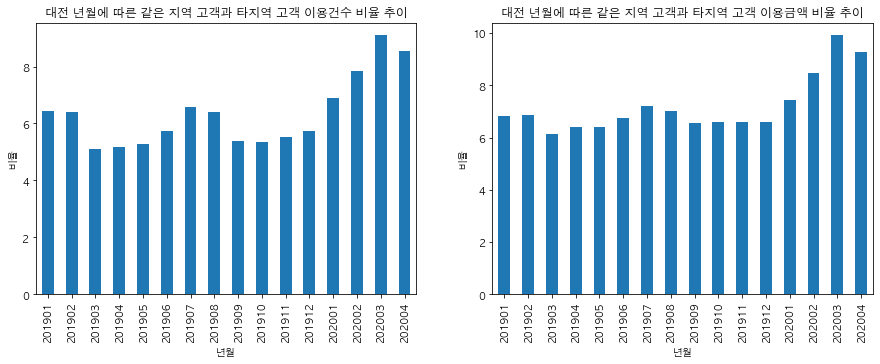

In [71]:
# 이용건수와 이용금액 시각화

plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)

CNTratio.plot.bar()
plt.xlabel('년월')
plt.ylabel('비율')
plt.title('대전 년월에 따른 같은 지역 고객과 타지역 고객 이용건수 비율 추이')

plt.subplot(1, 2, 2)

AMTratio.plot.bar()
plt.xlabel('년월')
plt.ylabel('비율')
plt.title('대전 년월에 따른 같은 지역 고객과 타지역 고객 이용금액 비율 추이')

plt.show()


In [72]:
# 코로나 전후 시각화

# 2019년 1월~4월, 2020년 1월~4월 이용건수 합 데이터 추출
SameCNT2019 = SameCNT.loc['201901':'201904']
SameCNT2020 = SameCNT.loc['202001':'202004']

DifferentCNT2019 = DifferentCNT.loc['201901':'201904']
DifferentCNT2020 = DifferentCNT.loc['202001':'202004']

# 2019년 1월~4월, 2020년 1월~4월 이용금액 합 데이터 추출
SameAMT2019 = SameAMT.loc['201901':'201904']
SameAMT2020 = SameAMT.loc['202001':'202004']

DifferentAMT2019 = DifferentAMT.loc['201901':'201904']
DifferentAMT2020 = DifferentAMT.loc['202001':'202004']


In [73]:
# 2019년 1월~4월, 2020년 1월~4월 이용금액 차이

SameAMTdifferenceValue = SameAMT2019.values - SameAMT2020.values
SameAMTdifferenceDF2 = {'대전': SameAMTdifferenceValue}
SameAMTdifference2 = pd.DataFrame(SameAMTdifferenceDF2, columns = ['대전'])

SameAMTdifference = pd.concat([SameAMTdifference, SameAMTdifference2], axis=1)

DifferentAMTdifferenceValue = DifferentAMT2019.values - DifferentAMT2020.values
DifferentAMTdifferenceDF2 = {'대전': DifferentAMTdifferenceValue}
DifferentAMTdifference2 = pd.DataFrame(DifferentAMTdifferenceDF2, columns = ['대전'])

DifferentAMTdifference = pd.concat([DifferentAMTdifference, DifferentAMTdifference2], axis=1)


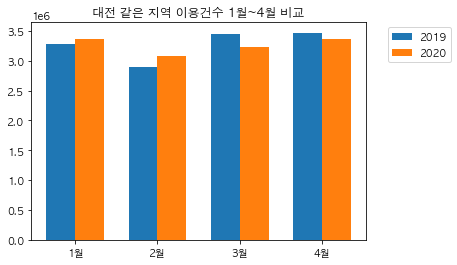

In [74]:
# 2019년 1월~4월, 2020년 1월~4월 같은 지역 이용건수 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, SameCNT2019, width)

p2 = ax.bar(ind + width, SameCNT2020, width)

ax.set_title('대전 같은 지역 이용건수 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()


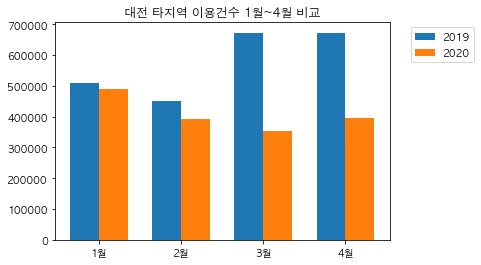

In [75]:
# 2019년 1월~4월, 2020년 1월~4월 타지역 이용건수 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, DifferentCNT2019, width)

p2 = ax.bar(ind + width, DifferentCNT2020, width)

ax.set_title('대전 타지역 이용건수 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()


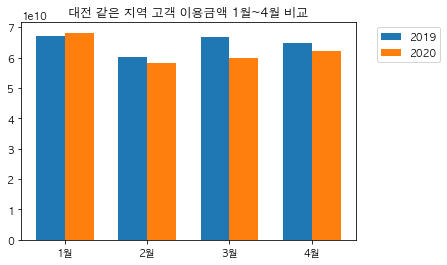

In [76]:
# 2019년 1월~4월, 2020년 1월~4월 같은 지역 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, SameAMT2019, width)

p2 = ax.bar(ind + width, SameAMT2020, width)

ax.set_title('대전 같은 지역 고객 이용금액 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()


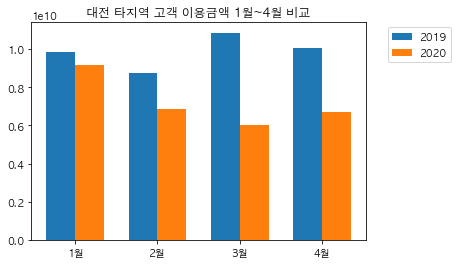

In [77]:
# 2019년 1월~4월, 2020년 1월~4월 타지역 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, DifferentAMT2019, width)

p2 = ax.bar(ind + width, DifferentAMT2020, width)

ax.set_title('대전 타지역 고객 이용금액 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()


In [78]:
# 이용금액 Sample T-test 실행

# 2019년 1~4월, 2020년 1~4월 이용금액 T-test

SameAMTttest = stats.ttest_ind(SameAMT2019.values, SameAMT2020.values)
DifferentAMTttest = stats.ttest_ind(DifferentAMT2019.values, DifferentAMT2020.values)

# 2019년 2월~4월, 2020년 2월~4월 이용건수 합 데이터 추출

SameAMT2019_2 = SameAMT.loc['201902':'201904']
SameAMT2020_2 = SameAMT.loc['202002':'202004']

DifferentAMT2019_2 = DifferentAMT.loc['201902':'201904']
DifferentAMT2020_2 = DifferentCNT.loc['202002':'202004']

# 2019년 2~4월, 2020년 2~4월 이용금액 T-test

SameAMTttest_2 = stats.ttest_ind(SameAMT2019_2.values, SameAMT2020_2.values)
DifferentAMTttest_2 = stats.ttest_ind(DifferentAMT2019_2.values, DifferentAMT2020_2.values)

print("2019년 1월~4월과 2020년 1월~4월 같은 지역 고객의 이용금액 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %SameAMTttest)
print("2019년 1월~4월과 2020년 1월~4월 타지역 고객의 이용금액 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %DifferentAMTttest)
print("2019년 2월~4월과 2020년 2월~4월 같은 지역 고객의 이용금액 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %SameAMTttest_2)
print("2019년 2월~4월과 2020년 2월~4월 타지역 고객의 이용금액 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %DifferentAMTttest_2)

2019년 1월~4월과 2020년 1월~4월 같은 지역 고객의 이용금액 t-statistics 값은 0.947 이며, p-value는 0.380 입니다.
2019년 1월~4월과 2020년 1월~4월 타지역 고객의 이용금액 t-statistics 값은 3.317 이며, p-value는 0.016 입니다.
2019년 2월~4월과 2020년 2월~4월 같은 지역 고객의 이용금액 t-statistics 값은 1.653 이며, p-value는 0.174 입니다.
2019년 2월~4월과 2020년 2월~4월 타지역 고객의 이용금액 t-statistics 값은 16.102 이며, p-value는 0.000 입니다.


## 부산

In [79]:
# 타지역 이용건수와 이용금액

DifferentCNT = differentDateCNT['부산']
DifferentAMT = differentDateAMT['부산']

# 같은지역 이용건수와 이용금액

SameCNT = sameDateCNT['부산']
SameAMT = sameDateAMT['부산']

# 타지역과 같은지역 비율

CNTratio = SameCNT/DifferentCNT
AMTratio = SameAMT/DifferentAMT


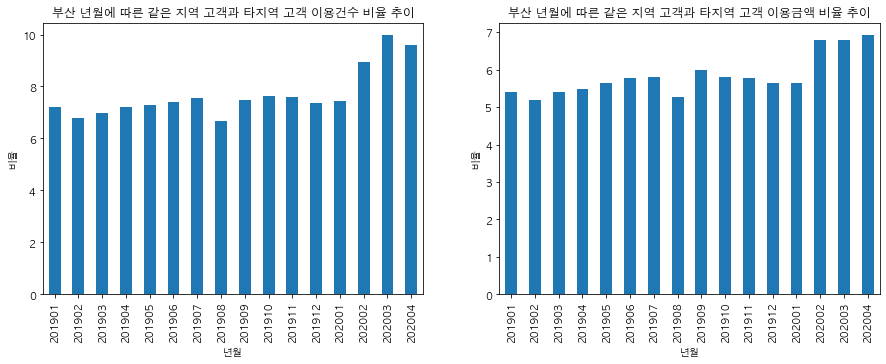

In [80]:
# 이용건수와 이용금액 시각화

plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)

CNTratio.plot.bar()
plt.xlabel('년월')
plt.ylabel('비율')
plt.title('부산 년월에 따른 같은 지역 고객과 타지역 고객 이용건수 비율 추이')

plt.subplot(1, 2, 2)

AMTratio.plot.bar()
plt.xlabel('년월')
plt.ylabel('비율')
plt.title('부산 년월에 따른 같은 지역 고객과 타지역 고객 이용금액 비율 추이')

plt.show()


In [81]:
# 코로나 전후 시각화

# 2019년 1월~4월, 2020년 1월~4월 이용건수 합 데이터 추출
SameCNT2019 = SameCNT.loc['201901':'201904']
SameCNT2020 = SameCNT.loc['202001':'202004']

DifferentCNT2019 = DifferentCNT.loc['201901':'201904']
DifferentCNT2020 = DifferentCNT.loc['202001':'202004']

# 2019년 1월~4월, 2020년 1월~4월 이용금액 합 데이터 추출
SameAMT2019 = SameAMT.loc['201901':'201904']
SameAMT2020 = SameAMT.loc['202001':'202004']

DifferentAMT2019 = DifferentAMT.loc['201901':'201904']
DifferentAMT2020 = DifferentAMT.loc['202001':'202004']


In [82]:
# 2019년 1월~4월, 2020년 1월~4월 이용금액 차이

SameAMTdifferenceValue = SameAMT2019.values - SameAMT2020.values
SameAMTdifferenceDF2 = {'부산': SameAMTdifferenceValue}
SameAMTdifference2 = pd.DataFrame(SameAMTdifferenceDF2, columns = ['부산'])

SameAMTdifference = pd.concat([SameAMTdifference, SameAMTdifference2], axis=1)

DifferentAMTdifferenceValue = DifferentAMT2019.values - DifferentAMT2020.values
DifferentAMTdifferenceDF2 = {'부산': DifferentAMTdifferenceValue}
DifferentAMTdifference2 = pd.DataFrame(DifferentAMTdifferenceDF2, columns = ['부산'])

DifferentAMTdifference = pd.concat([DifferentAMTdifference, DifferentAMTdifference2], axis=1)


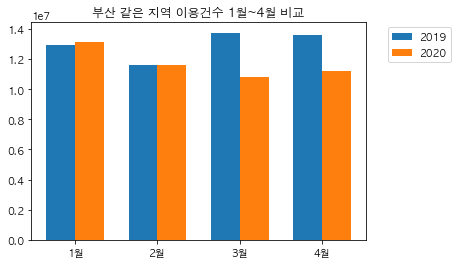

In [83]:
# 2019년 1월~4월, 2020년 1월~4월 같은 지역 이용건수 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, SameCNT2019, width)

p2 = ax.bar(ind + width, SameCNT2020, width)

ax.set_title('부산 같은 지역 이용건수 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()


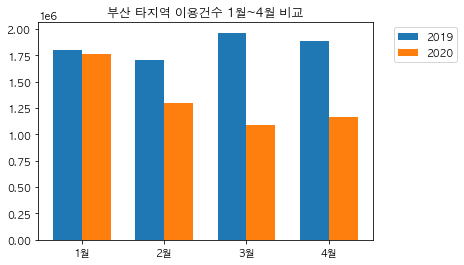

In [84]:
# 2019년 1월~4월, 2020년 1월~4월 타지역 이용건수 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, DifferentCNT2019, width)

p2 = ax.bar(ind + width, DifferentCNT2020, width)

ax.set_title('부산 타지역 이용건수 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()


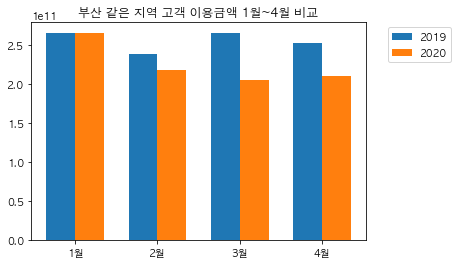

In [85]:
# 2019년 1월~4월, 2020년 1월~4월 같은 지역 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, SameAMT2019, width)

p2 = ax.bar(ind + width, SameAMT2020, width)

ax.set_title('부산 같은 지역 고객 이용금액 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()


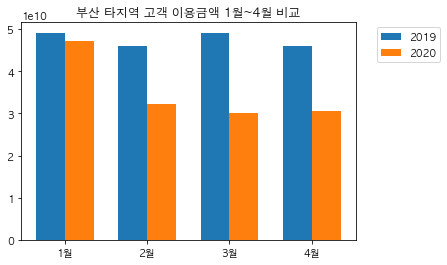

In [86]:
# 2019년 1월~4월, 2020년 1월~4월 타지역 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, DifferentAMT2019, width)

p2 = ax.bar(ind + width, DifferentAMT2020, width)

ax.set_title('부산 타지역 고객 이용금액 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()

In [87]:
# 이용금액 Sample T-test 실행

# 2019년 1~4월, 2020년 1~4월 이용금액 T-test

SameAMTttest = stats.ttest_ind(SameAMT2019.values, SameAMT2020.values)
DifferentAMTttest = stats.ttest_ind(DifferentAMT2019.values, DifferentAMT2020.values)

# 2019년 2월~4월, 2020년 2월~4월 이용건수 합 데이터 추출

SameAMT2019_2 = SameAMT.loc['201902':'201904']
SameAMT2020_2 = SameAMT.loc['202002':'202004']

DifferentAMT2019_2 = DifferentAMT.loc['201902':'201904']
DifferentAMT2020_2 = DifferentCNT.loc['202002':'202004']

# 2019년 2~4월, 2020년 2~4월 이용금액 T-test

SameAMTttest_2 = stats.ttest_ind(SameAMT2019_2.values, SameAMT2020_2.values)
DifferentAMTttest_2 = stats.ttest_ind(DifferentAMT2019_2.values, DifferentAMT2020_2.values)

print("2019년 1월~4월과 2020년 1월~4월 같은 지역 고객의 이용금액 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %SameAMTttest)
print("2019년 1월~4월과 2020년 1월~4월 타지역 고객의 이용금액 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %DifferentAMTttest)
print("2019년 2월~4월과 2020년 2월~4월 같은 지역 고객의 이용금액 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %SameAMTttest_2)
print("2019년 2월~4월과 2020년 2월~4월 타지역 고객의 이용금액 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %DifferentAMTttest_2)

2019년 1월~4월과 2020년 1월~4월 같은 지역 고객의 이용금액 t-statistics 값은 2.024 이며, p-value는 0.089 입니다.
2019년 1월~4월과 2020년 1월~4월 타지역 고객의 이용금액 t-statistics 값은 3.028 이며, p-value는 0.023 입니다.
2019년 2월~4월과 2020년 2월~4월 같은 지역 고객의 이용금액 t-statistics 값은 4.705 이며, p-value는 0.009 입니다.
2019년 2월~4월과 2020년 2월~4월 타지역 고객의 이용금액 t-statistics 값은 46.187 이며, p-value는 0.000 입니다.


## 서울

In [88]:
# 타지역 이용건수와 이용금액

DifferentCNT = differentDateCNT['서울']
DifferentAMT = differentDateAMT['서울']

# 같은지역 이용건수와 이용금액

SameCNT = sameDateCNT['서울']
SameAMT = sameDateAMT['서울']

# 타지역과 같은지역 비율

CNTratio = SameCNT/DifferentCNT
AMTratio = SameAMT/DifferentAMT


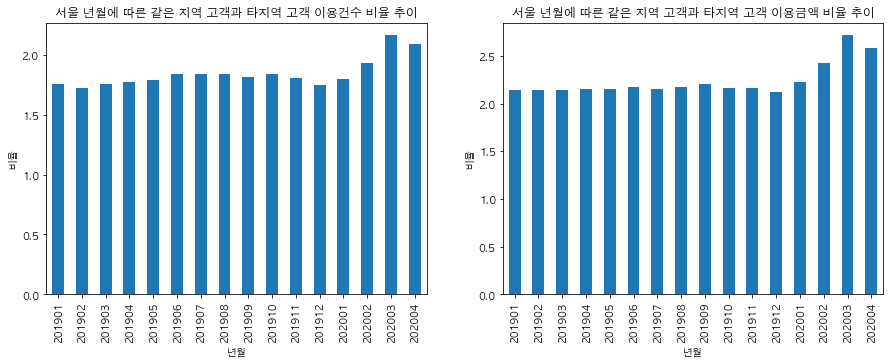

In [89]:
# 이용건수와 이용금액 시각화

plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)

CNTratio.plot.bar()
plt.xlabel('년월')
plt.ylabel('비율')
plt.title('서울 년월에 따른 같은 지역 고객과 타지역 고객 이용건수 비율 추이')

plt.subplot(1, 2, 2)

AMTratio.plot.bar()
plt.xlabel('년월')
plt.ylabel('비율')
plt.title('서울 년월에 따른 같은 지역 고객과 타지역 고객 이용금액 비율 추이')

plt.show()


In [90]:
# 코로나 전후 시각화

# 2019년 1월~4월, 2020년 1월~4월 이용건수 합 데이터 추출
SameCNT2019 = SameCNT.loc['201901':'201904']
SameCNT2020 = SameCNT.loc['202001':'202004']

DifferentCNT2019 = DifferentCNT.loc['201901':'201904']
DifferentCNT2020 = DifferentCNT.loc['202001':'202004']

# 2019년 1월~4월, 2020년 1월~4월 이용금액 합 데이터 추출
SameAMT2019 = SameAMT.loc['201901':'201904']
SameAMT2020 = SameAMT.loc['202001':'202004']

DifferentAMT2019 = DifferentAMT.loc['201901':'201904']
DifferentAMT2020 = DifferentAMT.loc['202001':'202004']


In [91]:
# 2019년 1월~4월, 2020년 1월~4월 이용금액 차이

SameAMTdifferenceValue = SameAMT2019.values - SameAMT2020.values
SameAMTdifferenceDF2 = {'서울': SameAMTdifferenceValue}
SameAMTdifference2 = pd.DataFrame(SameAMTdifferenceDF2, columns = ['서울'])

SameAMTdifference = pd.concat([SameAMTdifference, SameAMTdifference2], axis=1)

DifferentAMTdifferenceValue = DifferentAMT2019.values - DifferentAMT2020.values
DifferentAMTdifferenceDF2 = {'서울': DifferentAMTdifferenceValue}
DifferentAMTdifference2 = pd.DataFrame(DifferentAMTdifferenceDF2, columns = ['서울'])

DifferentAMTdifference = pd.concat([DifferentAMTdifference, DifferentAMTdifference2], axis=1)


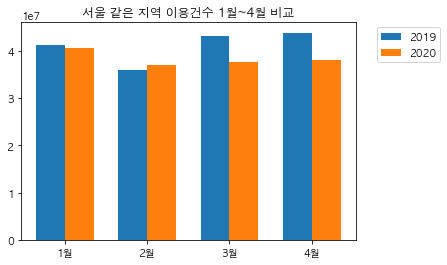

In [92]:
# 2019년 1월~4월, 2020년 1월~4월 같은 지역 이용건수 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, SameCNT2019, width)

p2 = ax.bar(ind + width, SameCNT2020, width)

ax.set_title('서울 같은 지역 이용건수 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()


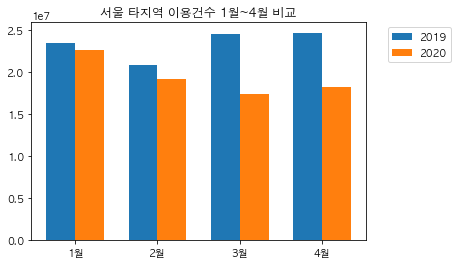

In [93]:
# 2019년 1월~4월, 2020년 1월~4월 타지역 이용건수 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, DifferentCNT2019, width)

p2 = ax.bar(ind + width, DifferentCNT2020, width)

ax.set_title('서울 타지역 이용건수 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()


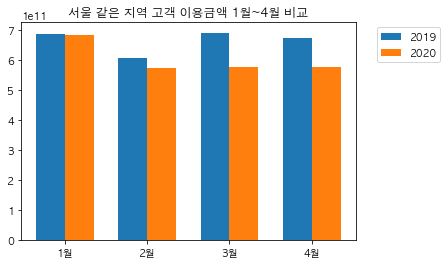

In [94]:
# 2019년 1월~4월, 2020년 1월~4월 같은 지역 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, SameAMT2019, width)

p2 = ax.bar(ind + width, SameAMT2020, width)

ax.set_title('서울 같은 지역 고객 이용금액 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()


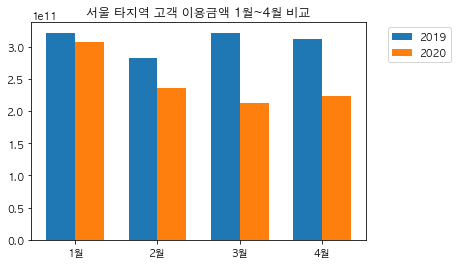

In [95]:
# 2019년 1월~4월, 2020년 1월~4월 타지역 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, DifferentAMT2019, width)

p2 = ax.bar(ind + width, DifferentAMT2020, width)

ax.set_title('서울 타지역 고객 이용금액 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()


In [96]:
# 이용금액 Sample T-test 실행

# 2019년 1~4월, 2020년 1~4월 이용금액 T-test

SameAMTttest = stats.ttest_ind(SameAMT2019.values, SameAMT2020.values)
DifferentAMTttest = stats.ttest_ind(DifferentAMT2019.values, DifferentAMT2020.values)

# 2019년 2월~4월, 2020년 2월~4월 이용건수 합 데이터 추출

SameAMT2019_2 = SameAMT.loc['201902':'201904']
SameAMT2020_2 = SameAMT.loc['202002':'202004']

DifferentAMT2019_2 = DifferentAMT.loc['201902':'201904']
DifferentAMT2020_2 = DifferentCNT.loc['202002':'202004']

# 2019년 2~4월, 2020년 2~4월 이용금액 T-test

SameAMTttest_2 = stats.ttest_ind(SameAMT2019_2.values, SameAMT2020_2.values)
DifferentAMTttest_2 = stats.ttest_ind(DifferentAMT2019_2.values, DifferentAMT2020_2.values)

print("2019년 1월~4월과 2020년 1월~4월 같은 지역 고객의 이용금액 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %SameAMTttest)
print("2019년 1월~4월과 2020년 1월~4월 타지역 고객의 이용금액 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %DifferentAMTttest)
print("2019년 2월~4월과 2020년 2월~4월 같은 지역 고객의 이용금액 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %SameAMTttest_2)
print("2019년 2월~4월과 2020년 2월~4월 타지역 고객의 이용금액 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %DifferentAMTttest_2)

2019년 1월~4월과 2020년 1월~4월 같은 지역 고객의 이용금액 t-statistics 값은 1.805 이며, p-value는 0.121 입니다.
2019년 1월~4월과 2020년 1월~4월 타지역 고객의 이용금액 t-statistics 값은 2.782 이며, p-value는 0.032 입니다.
2019년 2월~4월과 2020년 2월~4월 같은 지역 고객의 이용금액 t-statistics 값은 3.053 이며, p-value는 0.038 입니다.
2019년 2월~4월과 2020년 2월~4월 타지역 고객의 이용금액 t-statistics 값은 25.631 이며, p-value는 0.000 입니다.


## 세종

In [97]:
# 타지역 이용건수와 이용금액

DifferentCNT = differentDateCNT['세종']
DifferentAMT = differentDateAMT['세종']

# 같은지역 이용건수와 이용금액

SameCNT = sameDateCNT['세종']
SameAMT = sameDateAMT['세종']

# 타지역과 같은지역 비율

CNTratio = SameCNT/DifferentCNT
AMTratio = SameAMT/DifferentAMT


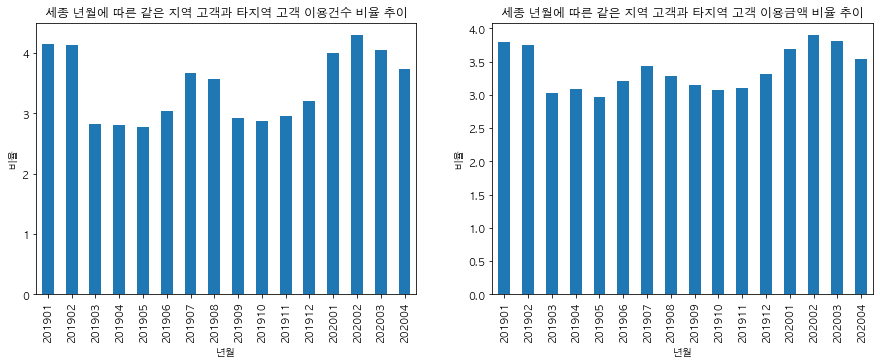

In [98]:
# 이용건수와 이용금액 시각화

plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)

CNTratio.plot.bar()
plt.xlabel('년월')
plt.ylabel('비율')
plt.title('세종 년월에 따른 같은 지역 고객과 타지역 고객 이용건수 비율 추이')

plt.subplot(1, 2, 2)

AMTratio.plot.bar()
plt.xlabel('년월')
plt.ylabel('비율')
plt.title('세종 년월에 따른 같은 지역 고객과 타지역 고객 이용금액 비율 추이')

plt.show()


In [99]:
# 코로나 전후 시각화

# 2019년 1월~4월, 2020년 1월~4월 이용건수 합 데이터 추출
SameCNT2019 = SameCNT.loc['201901':'201904']
SameCNT2020 = SameCNT.loc['202001':'202004']

DifferentCNT2019 = DifferentCNT.loc['201901':'201904']
DifferentCNT2020 = DifferentCNT.loc['202001':'202004']

# 2019년 1월~4월, 2020년 1월~4월 이용금액 합 데이터 추출
SameAMT2019 = SameAMT.loc['201901':'201904']
SameAMT2020 = SameAMT.loc['202001':'202004']

DifferentAMT2019 = DifferentAMT.loc['201901':'201904']
DifferentAMT2020 = DifferentAMT.loc['202001':'202004']



In [100]:
# 2019년 1월~4월, 2020년 1월~4월 이용금액 차이

SameAMTdifferenceValue = SameAMT2019.values - SameAMT2020.values
SameAMTdifferenceDF2 = {'세종': SameAMTdifferenceValue}
SameAMTdifference2 = pd.DataFrame(SameAMTdifferenceDF2, columns = ['세종'])

SameAMTdifference = pd.concat([SameAMTdifference, SameAMTdifference2], axis=1)

DifferentAMTdifferenceValue = DifferentAMT2019.values - DifferentAMT2020.values
DifferentAMTdifferenceDF2 = {'세종': DifferentAMTdifferenceValue}
DifferentAMTdifference2 = pd.DataFrame(DifferentAMTdifferenceDF2, columns = ['세종'])

DifferentAMTdifference = pd.concat([DifferentAMTdifference, DifferentAMTdifference2], axis=1)


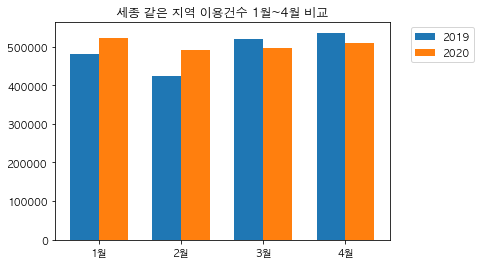

In [101]:
# 2019년 1월~4월, 2020년 1월~4월 같은 지역 이용건수 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, SameCNT2019, width)

p2 = ax.bar(ind + width, SameCNT2020, width)

ax.set_title('세종 같은 지역 이용건수 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()


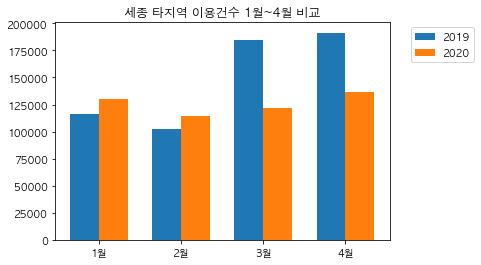

In [102]:
# 2019년 1월~4월, 2020년 1월~4월 타지역 이용건수 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, DifferentCNT2019, width)

p2 = ax.bar(ind + width, DifferentCNT2020, width)

ax.set_title('세종 타지역 이용건수 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()


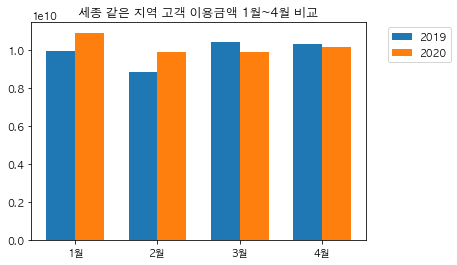

In [103]:
# 2019년 1월~4월, 2020년 1월~4월 같은 지역 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, SameAMT2019, width)

p2 = ax.bar(ind + width, SameAMT2020, width)

ax.set_title('세종 같은 지역 고객 이용금액 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()


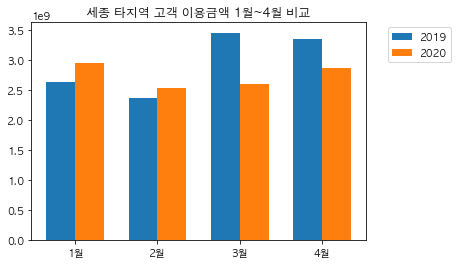

In [104]:
# 2019년 1월~4월, 2020년 1월~4월 타지역 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, DifferentAMT2019, width)

p2 = ax.bar(ind + width, DifferentAMT2020, width)

ax.set_title('세종 타지역 고객 이용금액 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()


In [105]:
# 이용금액 Sample T-test 실행

# 2019년 1~4월, 2020년 1~4월 이용금액 T-test

SameAMTttest = stats.ttest_ind(SameAMT2019.values, SameAMT2020.values)
DifferentAMTttest = stats.ttest_ind(DifferentAMT2019.values, DifferentAMT2020.values)

# 2019년 2월~4월, 2020년 2월~4월 이용건수 합 데이터 추출

SameAMT2019_2 = SameAMT.loc['201902':'201904']
SameAMT2020_2 = SameAMT.loc['202002':'202004']

DifferentAMT2019_2 = DifferentAMT.loc['201902':'201904']
DifferentAMT2020_2 = DifferentCNT.loc['202002':'202004']

# 2019년 2~4월, 2020년 2~4월 이용금액 T-test

SameAMTttest_2 = stats.ttest_ind(SameAMT2019_2.values, SameAMT2020_2.values)
DifferentAMTttest_2 = stats.ttest_ind(DifferentAMT2019_2.values, DifferentAMT2020_2.values)

print("2019년 1월~4월과 2020년 1월~4월 같은 지역 고객의 이용금액 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %SameAMTttest)
print("2019년 1월~4월과 2020년 1월~4월 타지역 고객의 이용금액 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %DifferentAMTttest)
print("2019년 2월~4월과 2020년 2월~4월 같은 지역 고객의 이용금액 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %SameAMTttest_2)
print("2019년 2월~4월과 2020년 2월~4월 타지역 고객의 이용금액 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %DifferentAMTttest_2)

2019년 1월~4월과 2020년 1월~4월 같은 지역 고객의 이용금액 t-statistics 값은 -0.708 이며, p-value는 0.505 입니다.
2019년 1월~4월과 2020년 1월~4월 타지역 고객의 이용금액 t-statistics 값은 0.724 이며, p-value는 0.496 입니다.
2019년 2월~4월과 2020년 2월~4월 같은 지역 고객의 이용금액 t-statistics 값은 -0.180 이며, p-value는 0.866 입니다.
2019년 2월~4월과 2020년 2월~4월 타지역 고객의 이용금액 t-statistics 값은 8.774 이며, p-value는 0.001 입니다.


## 울산

In [106]:
# 타지역 이용건수와 이용금액

DifferentCNT = differentDateCNT['울산']
DifferentAMT = differentDateAMT['울산']

# 같은지역 이용건수와 이용금액

SameCNT = sameDateCNT['울산']
SameAMT = sameDateAMT['울산']

# 타지역과 같은지역 비율

CNTratio = SameCNT/DifferentCNT
AMTratio = SameAMT/DifferentAMT


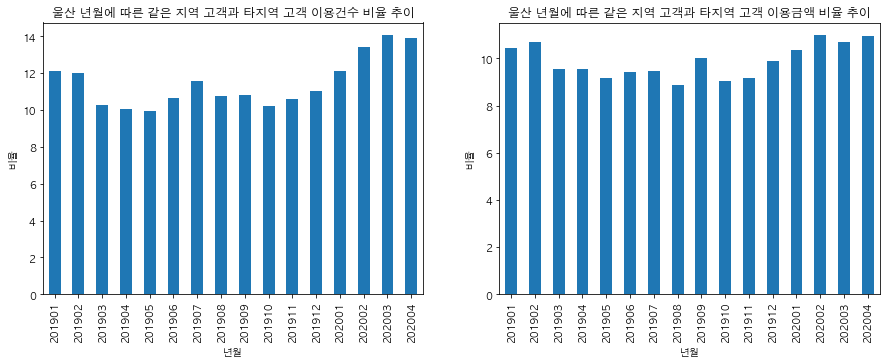

In [107]:
# 이용건수와 이용금액 시각화

plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)

CNTratio.plot.bar()
plt.xlabel('년월')
plt.ylabel('비율')
plt.title('울산 년월에 따른 같은 지역 고객과 타지역 고객 이용건수 비율 추이')

plt.subplot(1, 2, 2)

AMTratio.plot.bar()
plt.xlabel('년월')
plt.ylabel('비율')
plt.title('울산 년월에 따른 같은 지역 고객과 타지역 고객 이용금액 비율 추이')

plt.show()


In [108]:
# 코로나 전후 시각화

# 2019년 1월~4월, 2020년 1월~4월 이용건수 합 데이터 추출
SameCNT2019 = SameCNT.loc['201901':'201904']
SameCNT2020 = SameCNT.loc['202001':'202004']

DifferentCNT2019 = DifferentCNT.loc['201901':'201904']
DifferentCNT2020 = DifferentCNT.loc['202001':'202004']

# 2019년 1월~4월, 2020년 1월~4월 이용금액 합 데이터 추출
SameAMT2019 = SameAMT.loc['201901':'201904']
SameAMT2020 = SameAMT.loc['202001':'202004']

DifferentAMT2019 = DifferentAMT.loc['201901':'201904']
DifferentAMT2020 = DifferentAMT.loc['202001':'202004']


In [109]:
# 2019년 1월~4월, 2020년 1월~4월 이용금액 차이

SameAMTdifferenceValue = SameAMT2019.values - SameAMT2020.values
SameAMTdifferenceDF2 = {'울산': SameAMTdifferenceValue}
SameAMTdifference2 = pd.DataFrame(SameAMTdifferenceDF2, columns = ['울산'])

SameAMTdifference = pd.concat([SameAMTdifference, SameAMTdifference2], axis=1)

DifferentAMTdifferenceValue = DifferentAMT2019.values - DifferentAMT2020.values
DifferentAMTdifferenceDF2 = {'울산': DifferentAMTdifferenceValue}
DifferentAMTdifference2 = pd.DataFrame(DifferentAMTdifferenceDF2, columns = ['울산'])

DifferentAMTdifference = pd.concat([DifferentAMTdifference, DifferentAMTdifference2], axis=1)


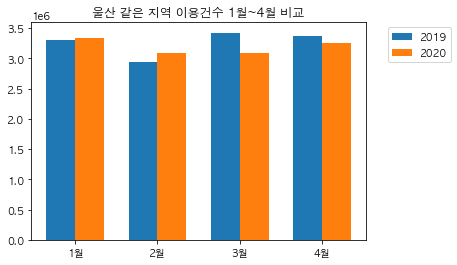

In [110]:
# 2019년 1월~4월, 2020년 1월~4월 같은 지역 이용건수 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, SameCNT2019, width)

p2 = ax.bar(ind + width, SameCNT2020, width)

ax.set_title('울산 같은 지역 이용건수 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()


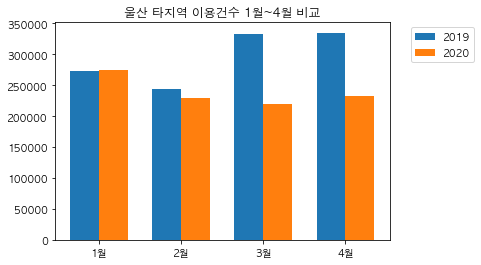

In [111]:
# 2019년 1월~4월, 2020년 1월~4월 타지역 이용건수 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, DifferentCNT2019, width)

p2 = ax.bar(ind + width, DifferentCNT2020, width)

ax.set_title('울산 타지역 이용건수 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()


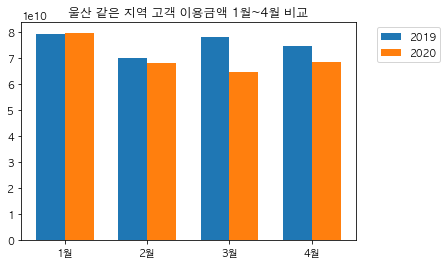

In [112]:
# 2019년 1월~4월, 2020년 1월~4월 같은 지역 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, SameAMT2019, width)

p2 = ax.bar(ind + width, SameAMT2020, width)

ax.set_title('울산 같은 지역 고객 이용금액 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()


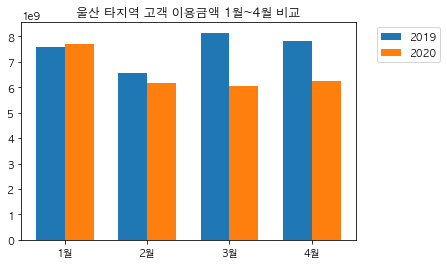

In [113]:
# 2019년 1월~4월, 2020년 1월~4월 타지역 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, DifferentAMT2019, width)

p2 = ax.bar(ind + width, DifferentAMT2020, width)

ax.set_title('울산 타지역 고객 이용금액 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()


In [114]:
# 이용금액 Sample T-test 실행

# 2019년 1~4월, 2020년 1~4월 이용금액 T-test

SameAMTttest = stats.ttest_ind(SameAMT2019.values, SameAMT2020.values)
DifferentAMTttest = stats.ttest_ind(DifferentAMT2019.values, DifferentAMT2020.values)

# 2019년 2월~4월, 2020년 2월~4월 이용건수 합 데이터 추출

SameAMT2019_2 = SameAMT.loc['201902':'201904']
SameAMT2020_2 = SameAMT.loc['202002':'202004']

DifferentAMT2019_2 = DifferentAMT.loc['201902':'201904']
DifferentAMT2020_2 = DifferentCNT.loc['202002':'202004']

# 2019년 2~4월, 2020년 2~4월 이용금액 T-test

SameAMTttest_2 = stats.ttest_ind(SameAMT2019_2.values, SameAMT2020_2.values)
DifferentAMTttest_2 = stats.ttest_ind(DifferentAMT2019_2.values, DifferentAMT2020_2.values)

print("2019년 1월~4월과 2020년 1월~4월 같은 지역 고객의 이용금액 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %SameAMTttest)
print("2019년 1월~4월과 2020년 1월~4월 타지역 고객의 이용금액 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %DifferentAMTttest)
print("2019년 2월~4월과 2020년 2월~4월 같은 지역 고객의 이용금액 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %SameAMTttest_2)
print("2019년 2월~4월과 2020년 2월~4월 타지역 고객의 이용금액 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %DifferentAMTttest_2)

2019년 1월~4월과 2020년 1월~4월 같은 지역 고객의 이용금액 t-statistics 값은 1.363 이며, p-value는 0.222 입니다.
2019년 1월~4월과 2020년 1월~4월 타지역 고객의 이용금액 t-statistics 값은 1.897 이며, p-value는 0.107 입니다.
2019년 2월~4월과 2020년 2월~4월 같은 지역 고객의 이용금액 t-statistics 값은 2.829 이며, p-value는 0.047 입니다.
2019년 2월~4월과 2020년 2월~4월 타지역 고객의 이용금액 t-statistics 값은 15.405 이며, p-value는 0.000 입니다.


## 인천

In [115]:
# 타지역 이용건수와 이용금액

DifferentCNT = differentDateCNT['인천']
DifferentAMT = differentDateAMT['인천']

# 같은지역 이용건수와 이용금액

SameCNT = sameDateCNT['인천']
SameAMT = sameDateAMT['인천']

# 타지역과 같은지역 비율

CNTratio = SameCNT/DifferentCNT
AMTratio = SameAMT/DifferentAMT


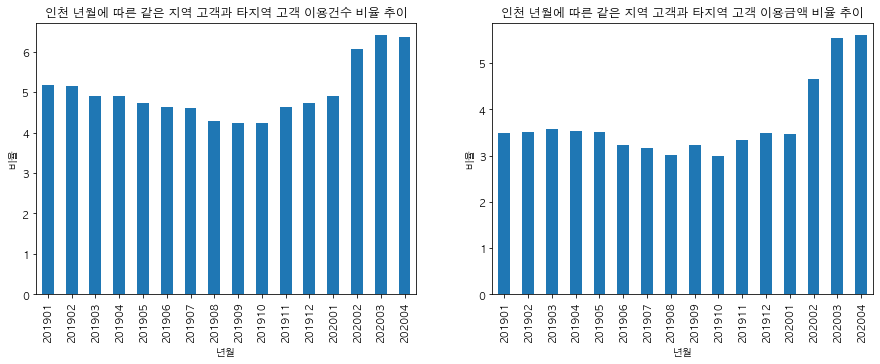

In [116]:
# 이용건수와 이용금액 시각화

plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)

CNTratio.plot.bar()
plt.xlabel('년월')
plt.ylabel('비율')
plt.title('인천 년월에 따른 같은 지역 고객과 타지역 고객 이용건수 비율 추이')

plt.subplot(1, 2, 2)

AMTratio.plot.bar()
plt.xlabel('년월')
plt.ylabel('비율')
plt.title('인천 년월에 따른 같은 지역 고객과 타지역 고객 이용금액 비율 추이')

plt.show()


In [117]:
# 코로나 전후 시각화

# 2019년 1월~4월, 2020년 1월~4월 이용건수 합 데이터 추출
SameCNT2019 = SameCNT.loc['201901':'201904']
SameCNT2020 = SameCNT.loc['202001':'202004']

DifferentCNT2019 = DifferentCNT.loc['201901':'201904']
DifferentCNT2020 = DifferentCNT.loc['202001':'202004']

# 2019년 1월~4월, 2020년 1월~4월 이용금액 합 데이터 추출
SameAMT2019 = SameAMT.loc['201901':'201904']
SameAMT2020 = SameAMT.loc['202001':'202004']

DifferentAMT2019 = DifferentAMT.loc['201901':'201904']
DifferentAMT2020 = DifferentAMT.loc['202001':'202004']


In [118]:
# 2019년 1월~4월, 2020년 1월~4월 이용금액 차이

SameAMTdifferenceValue = SameAMT2019.values - SameAMT2020.values
SameAMTdifferenceDF2 = {'인천': SameAMTdifferenceValue}
SameAMTdifference2 = pd.DataFrame(SameAMTdifferenceDF2, columns = ['인천'])

SameAMTdifference = pd.concat([SameAMTdifference, SameAMTdifference2], axis=1)

DifferentAMTdifferenceValue = DifferentAMT2019.values - DifferentAMT2020.values
DifferentAMTdifferenceDF2 = {'인천': DifferentAMTdifferenceValue}
DifferentAMTdifference2 = pd.DataFrame(DifferentAMTdifferenceDF2, columns = ['인천'])

DifferentAMTdifference = pd.concat([DifferentAMTdifference, DifferentAMTdifference2], axis=1)


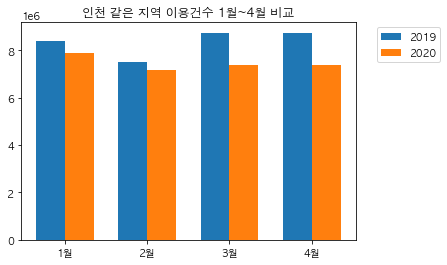

In [119]:
# 2019년 1월~4월, 2020년 1월~4월 같은 지역 이용건수 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, SameCNT2019, width)

p2 = ax.bar(ind + width, SameCNT2020, width)

ax.set_title('인천 같은 지역 이용건수 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()


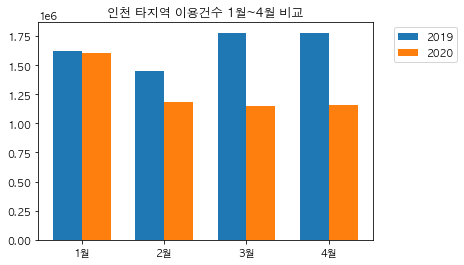

In [120]:
# 2019년 1월~4월, 2020년 1월~4월 타지역 이용건수 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, DifferentCNT2019, width)

p2 = ax.bar(ind + width, DifferentCNT2020, width)

ax.set_title('인천 타지역 이용건수 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()


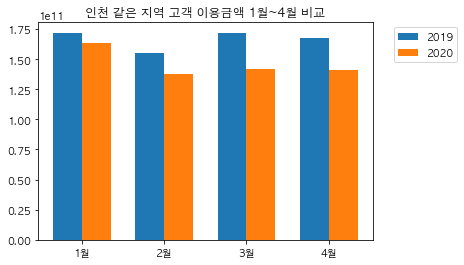

In [121]:
# 2019년 1월~4월, 2020년 1월~4월 같은 지역 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, SameAMT2019, width)

p2 = ax.bar(ind + width, SameAMT2020, width)

ax.set_title('인천 같은 지역 고객 이용금액 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()


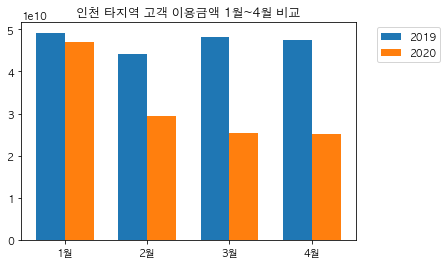

In [122]:
# 2019년 1월~4월, 2020년 1월~4월 타지역 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, DifferentAMT2019, width)

p2 = ax.bar(ind + width, DifferentAMT2020, width)

ax.set_title('인천 타지역 고객 이용금액 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()


In [123]:
# 이용금액 Sample T-test 실행

# 2019년 1~4월, 2020년 1~4월 이용금액 T-test

SameAMTttest = stats.ttest_ind(SameAMT2019.values, SameAMT2020.values)
DifferentAMTttest = stats.ttest_ind(DifferentAMT2019.values, DifferentAMT2020.values)

# 2019년 2월~4월, 2020년 2월~4월 이용건수 합 데이터 추출

SameAMT2019_2 = SameAMT.loc['201902':'201904']
SameAMT2020_2 = SameAMT.loc['202002':'202004']

DifferentAMT2019_2 = DifferentAMT.loc['201902':'201904']
DifferentAMT2020_2 = DifferentCNT.loc['202002':'202004']

# 2019년 2~4월, 2020년 2~4월 이용금액 T-test

SameAMTttest_2 = stats.ttest_ind(SameAMT2019_2.values, SameAMT2020_2.values)
DifferentAMTttest_2 = stats.ttest_ind(DifferentAMT2019_2.values, DifferentAMT2020_2.values)

print("2019년 1월~4월과 2020년 1월~4월 같은 지역 고객의 이용금액 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %SameAMTttest)
print("2019년 1월~4월과 2020년 1월~4월 타지역 고객의 이용금액 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %DifferentAMTttest)
print("2019년 2월~4월과 2020년 2월~4월 같은 지역 고객의 이용금액 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %SameAMTttest_2)
print("2019년 2월~4월과 2020년 2월~4월 타지역 고객의 이용금액 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %DifferentAMTttest_2)

2019년 1월~4월과 2020년 1월~4월 같은 지역 고객의 이용금액 t-statistics 값은 2.906 이며, p-value는 0.027 입니다.
2019년 1월~4월과 2020년 1월~4월 타지역 고객의 이용금액 t-statistics 값은 2.906 이며, p-value는 0.027 입니다.
2019년 2월~4월과 2020년 2월~4월 같은 지역 고객의 이용금액 t-statistics 값은 4.823 이며, p-value는 0.009 입니다.
2019년 2월~4월과 2020년 2월~4월 타지역 고객의 이용금액 t-statistics 값은 39.157 이며, p-value는 0.000 입니다.


## 전남

In [124]:
# 타지역 이용건수와 이용금액

DifferentCNT = differentDateCNT['전남']
DifferentAMT = differentDateAMT['전남']

# 같은지역 이용건수와 이용금액

SameCNT = sameDateCNT['전남']
SameAMT = sameDateAMT['전남']

# 타지역과 같은지역 비율

CNTratio = SameCNT/DifferentCNT
AMTratio = SameAMT/DifferentAMT


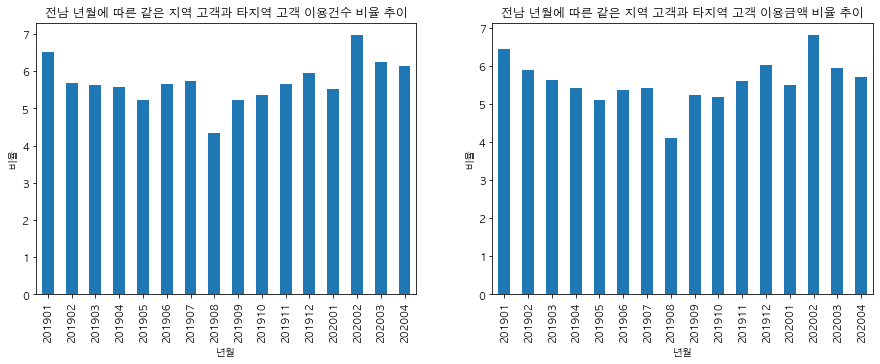

In [125]:
# 이용건수와 이용금액 시각화

plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)

CNTratio.plot.bar()
plt.xlabel('년월')
plt.ylabel('비율')
plt.title('전남 년월에 따른 같은 지역 고객과 타지역 고객 이용건수 비율 추이')

plt.subplot(1, 2, 2)

AMTratio.plot.bar()
plt.xlabel('년월')
plt.ylabel('비율')
plt.title('전남 년월에 따른 같은 지역 고객과 타지역 고객 이용금액 비율 추이')

plt.show()


In [126]:
# 코로나 전후 시각화

# 2019년 1월~4월, 2020년 1월~4월 이용건수 합 데이터 추출
SameCNT2019 = SameCNT.loc['201901':'201904']
SameCNT2020 = SameCNT.loc['202001':'202004']

DifferentCNT2019 = DifferentCNT.loc['201901':'201904']
DifferentCNT2020 = DifferentCNT.loc['202001':'202004']

# 2019년 1월~4월, 2020년 1월~4월 이용금액 합 데이터 추출
SameAMT2019 = SameAMT.loc['201901':'201904']
SameAMT2020 = SameAMT.loc['202001':'202004']

DifferentAMT2019 = DifferentAMT.loc['201901':'201904']
DifferentAMT2020 = DifferentAMT.loc['202001':'202004']


In [127]:
# 2019년 1월~4월, 2020년 1월~4월 이용금액 차이

SameAMTdifferenceValue = SameAMT2019.values - SameAMT2020.values
SameAMTdifferenceDF2 = {'전남': SameAMTdifferenceValue}
SameAMTdifference2 = pd.DataFrame(SameAMTdifferenceDF2, columns = ['전남'])

SameAMTdifference = pd.concat([SameAMTdifference, SameAMTdifference2], axis=1)

DifferentAMTdifferenceValue = DifferentAMT2019.values - DifferentAMT2020.values
DifferentAMTdifferenceDF2 = {'전남': DifferentAMTdifferenceValue}
DifferentAMTdifference2 = pd.DataFrame(DifferentAMTdifferenceDF2, columns = ['전남'])

DifferentAMTdifference = pd.concat([DifferentAMTdifference, DifferentAMTdifference2], axis=1)


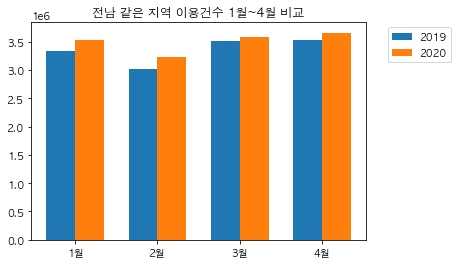

In [128]:
# 2019년 1월~4월, 2020년 1월~4월 같은 지역 이용건수 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, SameCNT2019, width)

p2 = ax.bar(ind + width, SameCNT2020, width)

ax.set_title('전남 같은 지역 이용건수 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()


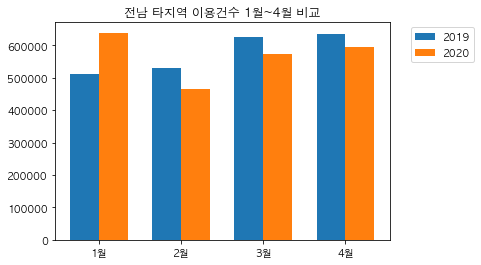

In [129]:
# 2019년 1월~4월, 2020년 1월~4월 타지역 이용건수 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, DifferentCNT2019, width)

p2 = ax.bar(ind + width, DifferentCNT2020, width)

ax.set_title('전남 타지역 이용건수 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()


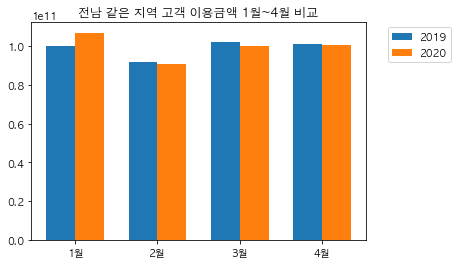

In [130]:
# 2019년 1월~4월, 2020년 1월~4월 같은 지역 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, SameAMT2019, width)

p2 = ax.bar(ind + width, SameAMT2020, width)

ax.set_title('전남 같은 지역 고객 이용금액 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()


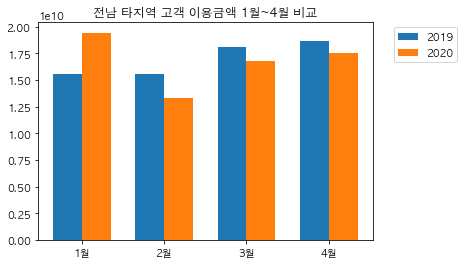

In [131]:
# 2019년 1월~4월, 2020년 1월~4월 타지역 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, DifferentAMT2019, width)

p2 = ax.bar(ind + width, DifferentAMT2020, width)

ax.set_title('전남 타지역 고객 이용금액 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()


In [132]:
# 이용금액 Sample T-test 실행

# 2019년 1~4월, 2020년 1~4월 이용금액 T-test

SameAMTttest = stats.ttest_ind(SameAMT2019.values, SameAMT2020.values)
DifferentAMTttest = stats.ttest_ind(DifferentAMT2019.values, DifferentAMT2020.values)

# 2019년 2월~4월, 2020년 2월~4월 이용건수 합 데이터 추출

SameAMT2019_2 = SameAMT.loc['201902':'201904']
SameAMT2020_2 = SameAMT.loc['202002':'202004']

DifferentAMT2019_2 = DifferentAMT.loc['201902':'201904']
DifferentAMT2020_2 = DifferentCNT.loc['202002':'202004']

# 2019년 2~4월, 2020년 2~4월 이용금액 T-test

SameAMTttest_2 = stats.ttest_ind(SameAMT2019_2.values, SameAMT2020_2.values)
DifferentAMTttest_2 = stats.ttest_ind(DifferentAMT2019_2.values, DifferentAMT2020_2.values)

print("2019년 1월~4월과 2020년 1월~4월 같은 지역 고객의 이용금액 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %SameAMTttest)
print("2019년 1월~4월과 2020년 1월~4월 타지역 고객의 이용금액 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %DifferentAMTttest)
print("2019년 2월~4월과 2020년 2월~4월 같은 지역 고객의 이용금액 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %SameAMTttest_2)
print("2019년 2월~4월과 2020년 2월~4월 타지역 고객의 이용금액 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %DifferentAMTttest_2)

2019년 1월~4월과 2020년 1월~4월 같은 지역 고객의 이용금액 t-statistics 값은 -0.148 이며, p-value는 0.887 입니다.
2019년 1월~4월과 2020년 1월~4월 타지역 고객의 이용금액 t-statistics 값은 0.137 이며, p-value는 0.896 입니다.
2019년 2월~4월과 2020년 2월~4월 같은 지역 고객의 이용금액 t-statistics 값은 0.308 이며, p-value는 0.773 입니다.
2019년 2월~4월과 2020년 2월~4월 타지역 고객의 이용금액 t-statistics 값은 18.217 이며, p-value는 0.000 입니다.


## 전북

In [133]:
# 타지역 이용건수와 이용금액

DifferentCNT = differentDateCNT['전북']
DifferentAMT = differentDateAMT['전북']

# 같은지역 이용건수와 이용금액

SameCNT = sameDateCNT['전북']
SameAMT = sameDateAMT['전북']

# 타지역과 같은지역 비율

CNTratio = SameCNT/DifferentCNT
AMTratio = SameAMT/DifferentAMT


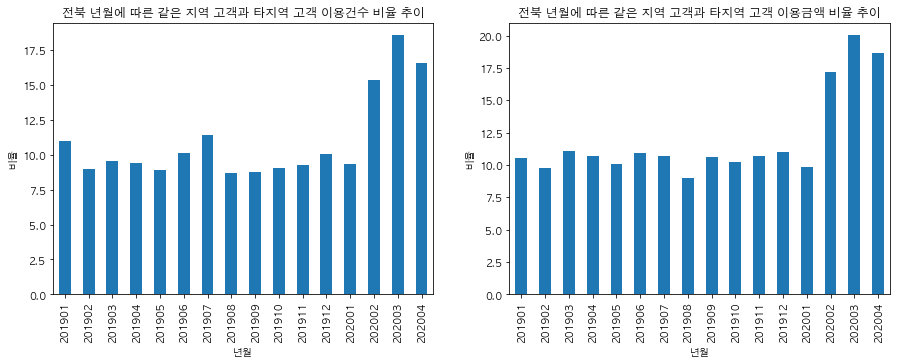

In [134]:
# 이용건수와 이용금액 시각화

plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)

CNTratio.plot.bar()
plt.xlabel('년월')
plt.ylabel('비율')
plt.title('전북 년월에 따른 같은 지역 고객과 타지역 고객 이용건수 비율 추이')

plt.subplot(1, 2, 2)

AMTratio.plot.bar()
plt.xlabel('년월')
plt.ylabel('비율')
plt.title('전북 년월에 따른 같은 지역 고객과 타지역 고객 이용금액 비율 추이')

plt.show()


In [135]:
# 코로나 전후 시각화

# 2019년 1월~4월, 2020년 1월~4월 이용건수 합 데이터 추출
SameCNT2019 = SameCNT.loc['201901':'201904']
SameCNT2020 = SameCNT.loc['202001':'202004']

DifferentCNT2019 = DifferentCNT.loc['201901':'201904']
DifferentCNT2020 = DifferentCNT.loc['202001':'202004']

# 2019년 1월~4월, 2020년 1월~4월 이용금액 합 데이터 추출
SameAMT2019 = SameAMT.loc['201901':'201904']
SameAMT2020 = SameAMT.loc['202001':'202004']

DifferentAMT2019 = DifferentAMT.loc['201901':'201904']
DifferentAMT2020 = DifferentAMT.loc['202001':'202004']


In [136]:
# 2019년 1월~4월, 2020년 1월~4월 이용금액 차이

SameAMTdifferenceValue = SameAMT2019.values - SameAMT2020.values
SameAMTdifferenceDF2 = {'전북': SameAMTdifferenceValue}
SameAMTdifference2 = pd.DataFrame(SameAMTdifferenceDF2, columns = ['전북'])

SameAMTdifference = pd.concat([SameAMTdifference, SameAMTdifference2], axis=1)

DifferentAMTdifferenceValue = DifferentAMT2019.values - DifferentAMT2020.values
DifferentAMTdifferenceDF2 = {'전북': DifferentAMTdifferenceValue}
DifferentAMTdifference2 = pd.DataFrame(DifferentAMTdifferenceDF2, columns = ['전북'])

DifferentAMTdifference = pd.concat([DifferentAMTdifference, DifferentAMTdifference2], axis=1)


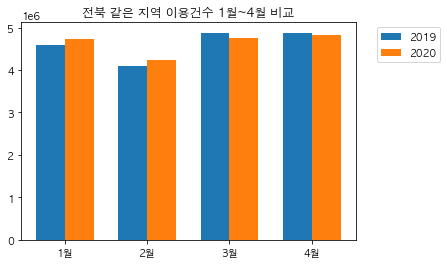

In [137]:
# 2019년 1월~4월, 2020년 1월~4월 같은 지역 이용건수 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, SameCNT2019, width)

p2 = ax.bar(ind + width, SameCNT2020, width)

ax.set_title('전북 같은 지역 이용건수 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()


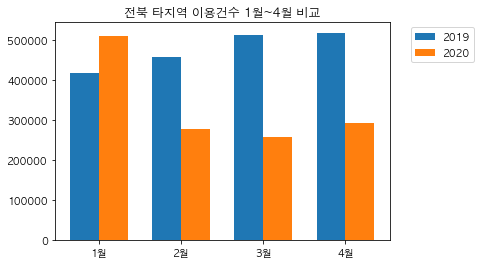

In [138]:
# 2019년 1월~4월, 2020년 1월~4월 타지역 이용건수 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, DifferentCNT2019, width)

p2 = ax.bar(ind + width, DifferentCNT2020, width)

ax.set_title('전북 타지역 이용건수 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()


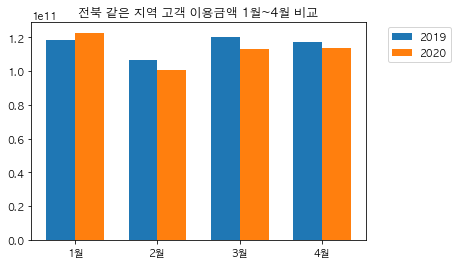

In [139]:
# 2019년 1월~4월, 2020년 1월~4월 같은 지역 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, SameAMT2019, width)

p2 = ax.bar(ind + width, SameAMT2020, width)

ax.set_title('전북 같은 지역 고객 이용금액 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()


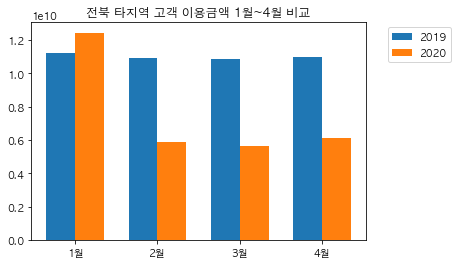

In [140]:
# 2019년 1월~4월, 2020년 1월~4월 타지역 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, DifferentAMT2019, width)

p2 = ax.bar(ind + width, DifferentAMT2020, width)

ax.set_title('전북 타지역 고객 이용금액 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()


In [141]:
# 이용금액 Sample T-test 실행

# 2019년 1~4월, 2020년 1~4월 이용금액 T-test

SameAMTttest = stats.ttest_ind(SameAMT2019.values, SameAMT2020.values)
DifferentAMTttest = stats.ttest_ind(DifferentAMT2019.values, DifferentAMT2020.values)

# 2019년 2월~4월, 2020년 2월~4월 이용건수 합 데이터 추출

SameAMT2019_2 = SameAMT.loc['201902':'201904']
SameAMT2020_2 = SameAMT.loc['202002':'202004']

DifferentAMT2019_2 = DifferentAMT.loc['201902':'201904']
DifferentAMT2020_2 = DifferentCNT.loc['202002':'202004']

# 2019년 2~4월, 2020년 2~4월 이용금액 T-test

SameAMTttest_2 = stats.ttest_ind(SameAMT2019_2.values, SameAMT2020_2.values)
DifferentAMTttest_2 = stats.ttest_ind(DifferentAMT2019_2.values, DifferentAMT2020_2.values)

print("2019년 1월~4월과 2020년 1월~4월 같은 지역 고객의 이용금액 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %SameAMTttest)
print("2019년 1월~4월과 2020년 1월~4월 타지역 고객의 이용금액 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %DifferentAMTttest)
print("2019년 2월~4월과 2020년 2월~4월 같은 지역 고객의 이용금액 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %SameAMTttest_2)
print("2019년 2월~4월과 2020년 2월~4월 타지역 고객의 이용금액 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %DifferentAMTttest_2)

2019년 1월~4월과 2020년 1월~4월 같은 지역 고객의 이용금액 t-statistics 값은 0.561 이며, p-value는 0.595 입니다.
2019년 1월~4월과 2020년 1월~4월 타지역 고객의 이용금액 t-statistics 값은 2.111 이며, p-value는 0.079 입니다.
2019년 2월~4월과 2020년 2월~4월 같은 지역 고객의 이용금액 t-statistics 값은 0.935 이며, p-value는 0.403 입니다.
2019년 2월~4월과 2020년 2월~4월 타지역 고객의 이용금액 t-statistics 값은 343.102 이며, p-value는 0.000 입니다.


## 제주

In [142]:
# 타지역 이용건수와 이용금액

DifferentCNT = differentDateCNT['제주']
DifferentAMT = differentDateAMT['제주']

# 같은지역 이용건수와 이용금액

SameCNT = sameDateCNT['제주']
SameAMT = sameDateAMT['제주']

# 타지역과 같은지역 비율

CNTratio = SameCNT/DifferentCNT
AMTratio = SameAMT/DifferentAMT


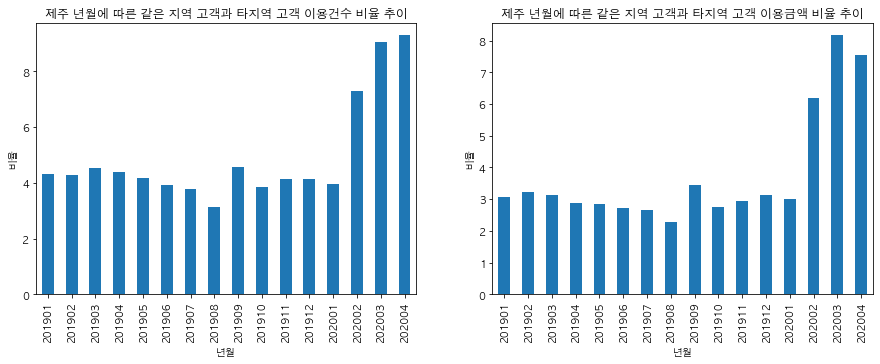

In [143]:
# 이용건수와 이용금액 시각화

plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)

CNTratio.plot.bar()
plt.xlabel('년월')
plt.ylabel('비율')
plt.title('제주 년월에 따른 같은 지역 고객과 타지역 고객 이용건수 비율 추이')

plt.subplot(1, 2, 2)

AMTratio.plot.bar()
plt.xlabel('년월')
plt.ylabel('비율')
plt.title('제주 년월에 따른 같은 지역 고객과 타지역 고객 이용금액 비율 추이')

plt.show()


In [144]:
# 코로나 전후 시각화

# 2019년 1월~4월, 2020년 1월~4월 이용건수 합 데이터 추출
SameCNT2019 = SameCNT.loc['201901':'201904']
SameCNT2020 = SameCNT.loc['202001':'202004']

DifferentCNT2019 = DifferentCNT.loc['201901':'201904']
DifferentCNT2020 = DifferentCNT.loc['202001':'202004']

# 2019년 1월~4월, 2020년 1월~4월 이용금액 합 데이터 추출
SameAMT2019 = SameAMT.loc['201901':'201904']
SameAMT2020 = SameAMT.loc['202001':'202004']

DifferentAMT2019 = DifferentAMT.loc['201901':'201904']
DifferentAMT2020 = DifferentAMT.loc['202001':'202004']


In [145]:
# 2019년 1월~4월, 2020년 1월~4월 이용금액 차이

SameAMTdifferenceValue = SameAMT2019.values - SameAMT2020.values
SameAMTdifferenceDF2 = {'제주': SameAMTdifferenceValue}
SameAMTdifference2 = pd.DataFrame(SameAMTdifferenceDF2, columns = ['제주'])

SameAMTdifference = pd.concat([SameAMTdifference, SameAMTdifference2], axis=1)

DifferentAMTdifferenceValue = DifferentAMT2019.values - DifferentAMT2020.values
DifferentAMTdifferenceDF2 = {'제주': DifferentAMTdifferenceValue}
DifferentAMTdifference2 = pd.DataFrame(DifferentAMTdifferenceDF2, columns = ['제주'])

DifferentAMTdifference = pd.concat([DifferentAMTdifference, DifferentAMTdifference2], axis=1)


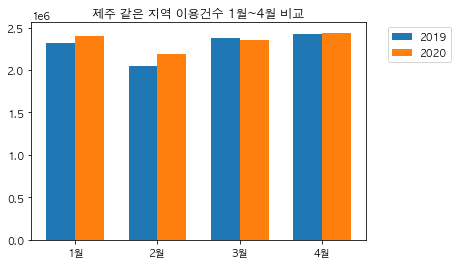

In [146]:
# 2019년 1월~4월, 2020년 1월~4월 같은 지역 이용건수 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, SameCNT2019, width)

p2 = ax.bar(ind + width, SameCNT2020, width)

ax.set_title('제주 같은 지역 이용건수 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()


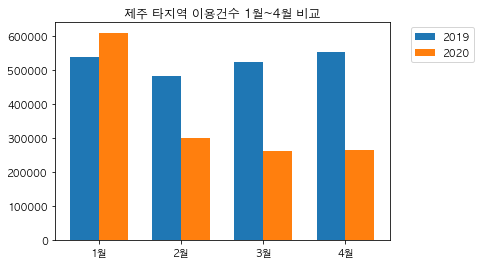

In [147]:
# 2019년 1월~4월, 2020년 1월~4월 타지역 이용건수 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, DifferentCNT2019, width)

p2 = ax.bar(ind + width, DifferentCNT2020, width)

ax.set_title('제주 타지역 이용건수 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()


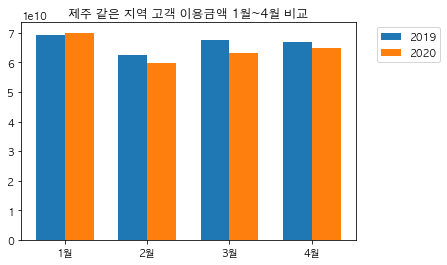

In [148]:
# 2019년 1월~4월, 2020년 1월~4월 같은 지역 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, SameAMT2019, width)

p2 = ax.bar(ind + width, SameAMT2020, width)

ax.set_title('제주 같은 지역 고객 이용금액 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()


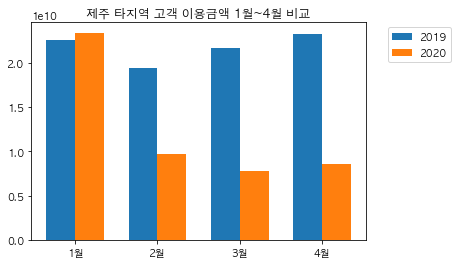

In [149]:
# 2019년 1월~4월, 2020년 1월~4월 타지역 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, DifferentAMT2019, width)

p2 = ax.bar(ind + width, DifferentAMT2020, width)

ax.set_title('제주 타지역 고객 이용금액 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()


In [150]:
# 이용금액 Sample T-test 실행

# 2019년 1~4월, 2020년 1~4월 이용금액 T-test

SameAMTttest = stats.ttest_ind(SameAMT2019.values, SameAMT2020.values)
DifferentAMTttest = stats.ttest_ind(DifferentAMT2019.values, DifferentAMT2020.values)

# 2019년 2월~4월, 2020년 2월~4월 이용건수 합 데이터 추출

SameAMT2019_2 = SameAMT.loc['201902':'201904']
SameAMT2020_2 = SameAMT.loc['202002':'202004']

DifferentAMT2019_2 = DifferentAMT.loc['201902':'201904']
DifferentAMT2020_2 = DifferentCNT.loc['202002':'202004']

# 2019년 2~4월, 2020년 2~4월 이용금액 T-test

SameAMTttest_2 = stats.ttest_ind(SameAMT2019_2.values, SameAMT2020_2.values)
DifferentAMTttest_2 = stats.ttest_ind(DifferentAMT2019_2.values, DifferentAMT2020_2.values)

print("2019년 1월~4월과 2020년 1월~4월 같은 지역 고객의 이용금액 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %SameAMTttest)
print("2019년 1월~4월과 2020년 1월~4월 타지역 고객의 이용금액 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %DifferentAMTttest)
print("2019년 2월~4월과 2020년 2월~4월 같은 지역 고객의 이용금액 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %SameAMTttest_2)
print("2019년 2월~4월과 2020년 2월~4월 타지역 고객의 이용금액 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %DifferentAMTttest_2)

2019년 1월~4월과 2020년 1월~4월 같은 지역 고객의 이용금액 t-statistics 값은 0.829 이며, p-value는 0.439 입니다.
2019년 1월~4월과 2020년 1월~4월 타지역 고객의 이용금액 t-statistics 값은 2.461 이며, p-value는 0.049 입니다.
2019년 2월~4월과 2020년 2월~4월 같은 지역 고객의 이용금액 t-statistics 값은 1.435 이며, p-value는 0.225 입니다.
2019년 2월~4월과 2020년 2월~4월 타지역 고객의 이용금액 t-statistics 값은 19.235 이며, p-value는 0.000 입니다.


## 충남

In [151]:
# 타지역 이용건수와 이용금액

DifferentCNT = differentDateCNT['충남']
DifferentAMT = differentDateAMT['충남']

# 같은지역 이용건수와 이용금액

SameCNT = sameDateCNT['충남']
SameAMT = sameDateAMT['충남']

# 타지역과 같은지역 비율

CNTratio = SameCNT/DifferentCNT
AMTratio = SameAMT/DifferentAMT


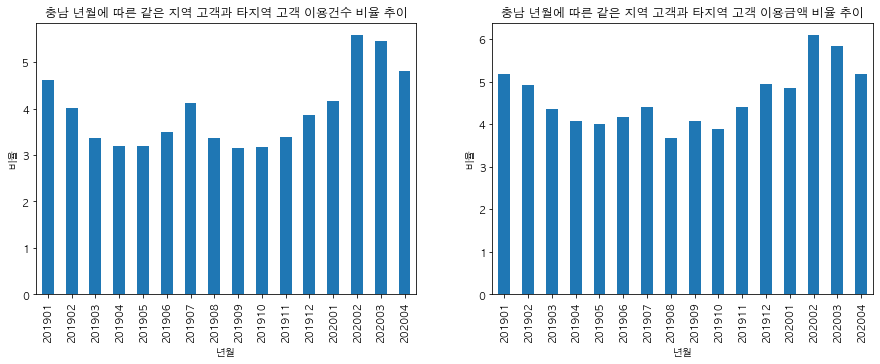

In [152]:
# 이용건수와 이용금액 시각화

plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)

CNTratio.plot.bar()
plt.xlabel('년월')
plt.ylabel('비율')
plt.title('충남 년월에 따른 같은 지역 고객과 타지역 고객 이용건수 비율 추이')

plt.subplot(1, 2, 2)

AMTratio.plot.bar()
plt.xlabel('년월')
plt.ylabel('비율')
plt.title('충남 년월에 따른 같은 지역 고객과 타지역 고객 이용금액 비율 추이')

plt.show()


In [153]:
# 코로나 전후 시각화

# 2019년 1월~4월, 2020년 1월~4월 이용건수 합 데이터 추출
SameCNT2019 = SameCNT.loc['201901':'201904']
SameCNT2020 = SameCNT.loc['202001':'202004']

DifferentCNT2019 = DifferentCNT.loc['201901':'201904']
DifferentCNT2020 = DifferentCNT.loc['202001':'202004']

# 2019년 1월~4월, 2020년 1월~4월 이용금액 합 데이터 추출
SameAMT2019 = SameAMT.loc['201901':'201904']
SameAMT2020 = SameAMT.loc['202001':'202004']

DifferentAMT2019 = DifferentAMT.loc['201901':'201904']
DifferentAMT2020 = DifferentAMT.loc['202001':'202004']


In [154]:
# 2019년 1월~4월, 2020년 1월~4월 이용금액 차이

SameAMTdifferenceValue = SameAMT2019.values - SameAMT2020.values
SameAMTdifferenceDF2 = {'충남': SameAMTdifferenceValue}
SameAMTdifference2 = pd.DataFrame(SameAMTdifferenceDF2, columns = ['충남'])

SameAMTdifference = pd.concat([SameAMTdifference, SameAMTdifference2], axis=1)

DifferentAMTdifferenceValue = DifferentAMT2019.values - DifferentAMT2020.values
DifferentAMTdifferenceDF2 = {'충남': DifferentAMTdifferenceValue}
DifferentAMTdifference2 = pd.DataFrame(DifferentAMTdifferenceDF2, columns = ['충남'])

DifferentAMTdifference = pd.concat([DifferentAMTdifference, DifferentAMTdifference2], axis=1)


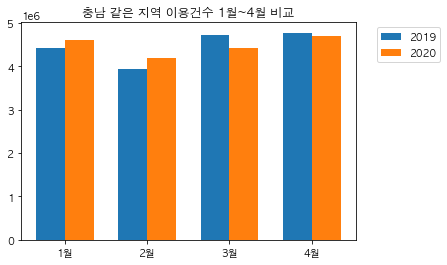

In [155]:
# 2019년 1월~4월, 2020년 1월~4월 같은 지역 이용건수 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, SameCNT2019, width)

p2 = ax.bar(ind + width, SameCNT2020, width)

ax.set_title('충남 같은 지역 이용건수 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()


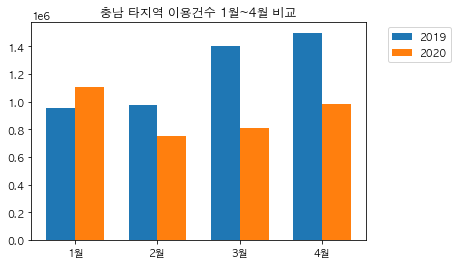

In [156]:
# 2019년 1월~4월, 2020년 1월~4월 타지역 이용건수 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, DifferentCNT2019, width)

p2 = ax.bar(ind + width, DifferentCNT2020, width)

ax.set_title('충남 타지역 이용건수 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()


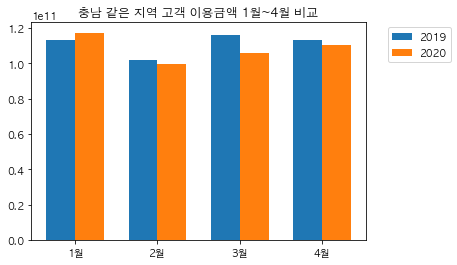

In [157]:
# 2019년 1월~4월, 2020년 1월~4월 같은 지역 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, SameAMT2019, width)

p2 = ax.bar(ind + width, SameAMT2020, width)

ax.set_title('충남 같은 지역 고객 이용금액 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()


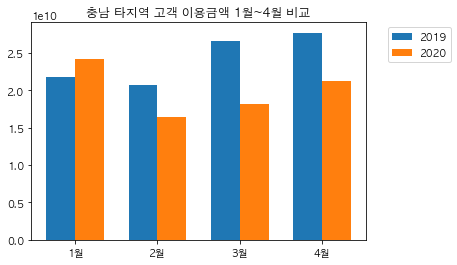

In [158]:
# 2019년 1월~4월, 2020년 1월~4월 타지역 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, DifferentAMT2019, width)

p2 = ax.bar(ind + width, DifferentAMT2020, width)

ax.set_title('충남 타지역 고객 이용금액 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()


In [159]:
# 이용금액 Sample T-test 실행

# 2019년 1~4월, 2020년 1~4월 이용금액 T-test

SameAMTttest = stats.ttest_ind(SameAMT2019.values, SameAMT2020.values)
DifferentAMTttest = stats.ttest_ind(DifferentAMT2019.values, DifferentAMT2020.values)

# 2019년 2월~4월, 2020년 2월~4월 이용건수 합 데이터 추출

SameAMT2019_2 = SameAMT.loc['201902':'201904']
SameAMT2020_2 = SameAMT.loc['202002':'202004']

DifferentAMT2019_2 = DifferentAMT.loc['201902':'201904']
DifferentAMT2020_2 = DifferentCNT.loc['202002':'202004']

# 2019년 2~4월, 2020년 2~4월 이용금액 T-test

SameAMTttest_2 = stats.ttest_ind(SameAMT2019_2.values, SameAMT2020_2.values)
DifferentAMTttest_2 = stats.ttest_ind(DifferentAMT2019_2.values, DifferentAMT2020_2.values)

print("2019년 1월~4월과 2020년 1월~4월 같은 지역 고객의 이용금액 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %SameAMTttest)
print("2019년 1월~4월과 2020년 1월~4월 타지역 고객의 이용금액 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %DifferentAMTttest)
print("2019년 2월~4월과 2020년 2월~4월 같은 지역 고객의 이용금액 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %SameAMTttest_2)
print("2019년 2월~4월과 2020년 2월~4월 타지역 고객의 이용금액 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %DifferentAMTttest_2)

2019년 1월~4월과 2020년 1월~4월 같은 지역 고객의 이용금액 t-statistics 값은 0.539 이며, p-value는 0.609 입니다.
2019년 1월~4월과 2020년 1월~4월 타지역 고객의 이용금액 t-statistics 값은 1.723 이며, p-value는 0.136 입니다.
2019년 2월~4월과 2020년 2월~4월 같은 지역 고객의 이용금액 t-statistics 값은 0.934 이며, p-value는 0.403 입니다.
2019년 2월~4월과 2020년 2월~4월 타지역 고객의 이용금액 t-statistics 값은 11.551 이며, p-value는 0.000 입니다.


## 충북

In [160]:
# 타지역 이용건수와 이용금액

DifferentCNT = differentDateCNT['충북']
DifferentAMT = differentDateAMT['충북']

# 같은지역 이용건수와 이용금액

SameCNT = sameDateCNT['충북']
SameAMT = sameDateAMT['충북']

# 타지역과 같은지역 비율

CNTratio = SameCNT/DifferentCNT
AMTratio = SameAMT/DifferentAMT


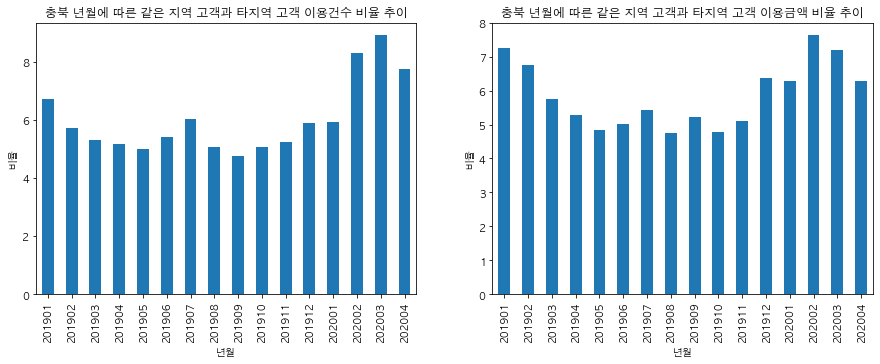

In [161]:
# 이용건수와 이용금액 시각화

plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)

CNTratio.plot.bar()
plt.xlabel('년월')
plt.ylabel('비율')
plt.title('충북 년월에 따른 같은 지역 고객과 타지역 고객 이용건수 비율 추이')

plt.subplot(1, 2, 2)

AMTratio.plot.bar()
plt.xlabel('년월')
plt.ylabel('비율')
plt.title('충북 년월에 따른 같은 지역 고객과 타지역 고객 이용금액 비율 추이')

plt.show()


In [162]:
# 코로나 전후 시각화

# 2019년 1월~4월, 2020년 1월~4월 이용건수 합 데이터 추출
SameCNT2019 = SameCNT.loc['201901':'201904']
SameCNT2020 = SameCNT.loc['202001':'202004']

DifferentCNT2019 = DifferentCNT.loc['201901':'201904']
DifferentCNT2020 = DifferentCNT.loc['202001':'202004']

# 2019년 1월~4월, 2020년 1월~4월 이용금액 합 데이터 추출
SameAMT2019 = SameAMT.loc['201901':'201904']
SameAMT2020 = SameAMT.loc['202001':'202004']

DifferentAMT2019 = DifferentAMT.loc['201901':'201904']
DifferentAMT2020 = DifferentAMT.loc['202001':'202004']


In [163]:
# 2019년 1월~4월, 2020년 1월~4월 이용금액 차이

SameAMTdifferenceValue = SameAMT2019.values - SameAMT2020.values
SameAMTdifferenceDF2 = {'충북': SameAMTdifferenceValue}
SameAMTdifference2 = pd.DataFrame(SameAMTdifferenceDF2, columns = ['충북'])

SameAMTdifference = pd.concat([SameAMTdifference, SameAMTdifference2], axis=1)

DifferentAMTdifferenceValue = DifferentAMT2019.values - DifferentAMT2020.values
DifferentAMTdifferenceDF2 = {'충북': DifferentAMTdifferenceValue}
DifferentAMTdifference2 = pd.DataFrame(DifferentAMTdifferenceDF2, columns = ['충북'])

DifferentAMTdifference = pd.concat([DifferentAMTdifference, DifferentAMTdifference2], axis=1)


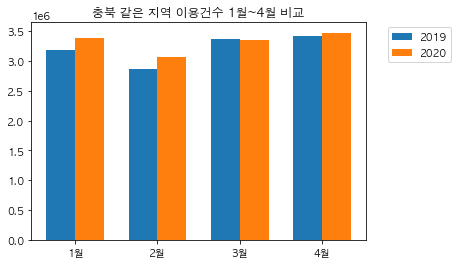

In [164]:
# 2019년 1월~4월, 2020년 1월~4월 같은 지역 이용건수 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, SameCNT2019, width)

p2 = ax.bar(ind + width, SameCNT2020, width)

ax.set_title('충북 같은 지역 이용건수 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()


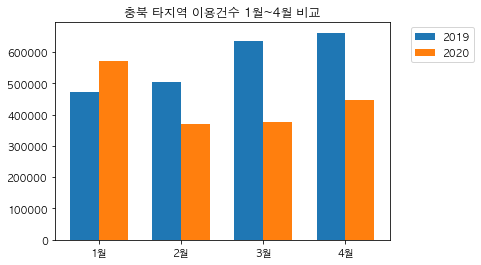

In [165]:
# 2019년 1월~4월, 2020년 1월~4월 타지역 이용건수 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, DifferentCNT2019, width)

p2 = ax.bar(ind + width, DifferentCNT2020, width)

ax.set_title('충북 타지역 이용건수 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()


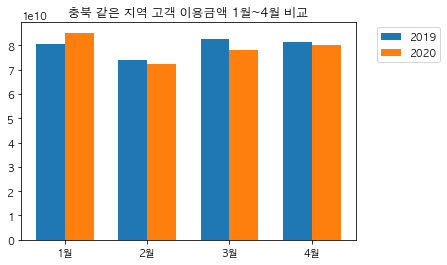

In [166]:
# 2019년 1월~4월, 2020년 1월~4월 같은 지역 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, SameAMT2019, width)

p2 = ax.bar(ind + width, SameAMT2020, width)

ax.set_title('충북 같은 지역 고객 이용금액 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()


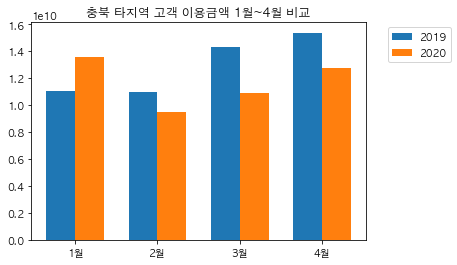

In [167]:
# 2019년 1월~4월, 2020년 1월~4월 타지역 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, DifferentAMT2019, width)

p2 = ax.bar(ind + width, DifferentAMT2020, width)

ax.set_title('충북 타지역 고객 이용금액 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()


In [168]:
# 이용금액 Sample T-test 실행

# 2019년 1~4월, 2020년 1~4월 이용금액 T-test

SameAMTttest = stats.ttest_ind(SameAMT2019.values, SameAMT2020.values)
DifferentAMTttest = stats.ttest_ind(DifferentAMT2019.values, DifferentAMT2020.values)

# 2019년 2월~4월, 2020년 2월~4월 이용건수 합 데이터 추출

SameAMT2019_2 = SameAMT.loc['201902':'201904']
SameAMT2020_2 = SameAMT.loc['202002':'202004']

DifferentAMT2019_2 = DifferentAMT.loc['201902':'201904']
DifferentAMT2020_2 = DifferentCNT.loc['202002':'202004']

# 2019년 2~4월, 2020년 2~4월 이용금액 T-test

SameAMTttest_2 = stats.ttest_ind(SameAMT2019_2.values, SameAMT2020_2.values)
DifferentAMTttest_2 = stats.ttest_ind(DifferentAMT2019_2.values, DifferentAMT2020_2.values)

print("2019년 1월~4월과 2020년 1월~4월 같은 지역 고객의 이용금액 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %SameAMTttest)
print("2019년 1월~4월과 2020년 1월~4월 타지역 고객의 이용금액 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %DifferentAMTttest)
print("2019년 2월~4월과 2020년 2월~4월 같은 지역 고객의 이용금액 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %SameAMTttest_2)
print("2019년 2월~4월과 2020년 2월~4월 타지역 고객의 이용금액 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %DifferentAMTttest_2)

2019년 1월~4월과 2020년 1월~4월 같은 지역 고객의 이용금액 t-statistics 값은 0.163 이며, p-value는 0.876 입니다.
2019년 1월~4월과 2020년 1월~4월 타지역 고객의 이용금액 t-statistics 값은 0.864 이며, p-value는 0.421 입니다.
2019년 2월~4월과 2020년 2월~4월 같은 지역 고객의 이용금액 t-statistics 값은 0.636 이며, p-value는 0.559 입니다.
2019년 2월~4월과 2020년 2월~4월 타지역 고객의 이용금액 t-statistics 값은 10.160 이며, p-value는 0.001 입니다.


### 이용금액 차이 csv 파일로 저장

In [169]:
SameAMTdifference.to_csv('/Users/ChaeEun/Desktop/같은지역_이용금액_차이.csv', sep=',', na_rep='NaN')
DifferentAMTdifference.to_csv('/Users/ChaeEun/Desktop/타지역_이용금액_차이.csv', sep=',', na_rep='NaN')